# I- Importing data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio

USER = ""
HOSTNAME = ""
PASSWORD = ""
PORT = ""
DATABASE = ""


connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
sql = f"""SELECT * FROM public.epa_bdf_normalisation;"""
data = sqlio.read_sql_query(sql, connection)
connection.close()

# II- Data exploration

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
print(f"This data contains : {len(data)}")
print("In each column the number of none values :")
print(data.isnull().sum())

This data contains : 684
In each column the number of none values :
Site                0
Type                0
Season              0
Site #              0
Moment              0
2378-TCDD_A         0
12378-PeCDD_A       0
123478-HxCDD_A      0
123678-HxCDD_A      0
123789-HxCDD_A      0
1234678-HpCDD_A     0
OCDD_A              0
2378-TCDF_A         0
12378-PeCDF_A       0
23478-PeCDF_A       0
123478-HxCDF_A      0
123678-HxCDF_A      0
234678-HxCDF_A      0
123789-HxCDF_A      0
1234678-HpCDF_A     0
1234789-HpCDF_A     0
OCDF_A              0
2378-TCDD_C        56
12378-PeCDD_C      56
123478-HxCDD_C     56
123678-HxCDD_C     56
123789-HxCDD_C     56
1234678-HpCDD_C    56
OCDD_C             56
2378-TCDF_C        56
12378-PeCDF_C      56
23478-PeCDF_C      56
123478-HxCDF_C     56
123678-HxCDF_C     56
234678-HxCDF_C     56
123789-HxCDF_C     56
1234678-HpCDF_C    56
1234789-HpCDF_C    56
OCDF_C             56
dtype: int64


In [4]:
data.describe()

,Site #,Moment,2378-TCDD_A,12378-PeCDD_A,123478-HxCDD_A,123678-HxCDD_A,123789-HxCDD_A,1234678-HpCDD_A,OCDD_A,2378-TCDF_A,...,2378-TCDF_C,12378-PeCDF_C,23478-PeCDF_C,123478-HxCDF_C,123678-HxCDF_C,234678-HxCDF_C,123789-HxCDF_C,1234678-HpCDF_C,1234789-HpCDF_C,OCDF_C
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,...,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,16.507310,18.059942,0.001457,0.006649,0.007309,0.013318,0.012759,0.176100,0.636301,0.005647,...,0.027180,0.042278,0.071425,0.080421,0.073819,0.098387,0.011948,0.588241,0.065703,0.083119
std,9.612474,7.111797,0.002161,0.007862,0.004213,0.006795,0.009170,0.041133,0.091836,0.007111,...,0.009972,0.018650,0.031547,0.024234,0.018715,0.035431,0.012872,0.088643,0.025024,0.044912
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006543,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031108,0.000000,0.000000
25%,8.000000,13.000000,0.000547,0.003695,0.005388,0.009894,0.009608,0.152310,0.600099,0.002262,...,0.021971,0.032838,0.052991,0.065597,0.060840,0.074436,0.002622,0.538713,0.054361,0.057441
50%,16.000000,19.000000,0.000846,0.005109,0.006775,0.012609,0.012156,0.176127,0.655883,0.003930,...,0.026102,0.041923,0.070855,0.083044,0.076563,0.102249,0.007986,0.584837,0.069001,0.077606
75%,25.000000,24.000000,0.001432,0.006700,0.008282,0.015126,0.014592,0.199483,0.688999,0.006645,...,0.031186,0.049388,0.084283,0.096114,0.086030,0.120044,0.015889,0.636164,0.079698,0.098146
max,35.000000,29.000000,0.019895,0.084595,0.035076,0.066760,0.197259,0.645560,0.950345,0.078577,...,0.087089,0.220647,0.264289,0.174769,0.146091,0.390897,0.092300,0.962749,0.175745,0.459146


# III- Try to classify by season

In [5]:
data_season = data.drop(data[data['Season']=='Spring/Sum'].index)
data_season = data_season.drop(data_season[data_season['Season']=='Winter (late)'].index)

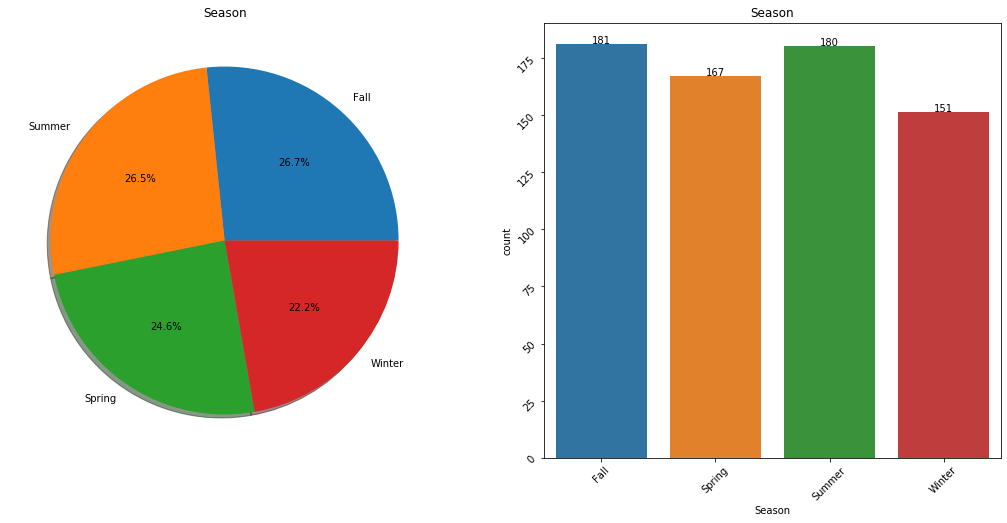

In [6]:
col = 'Season'
f,ax=plt.subplots(1,2,figsize=(18,8))
data_season[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=data_season,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [7]:
data_season['label'] = data_season['Season'].map({'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3})

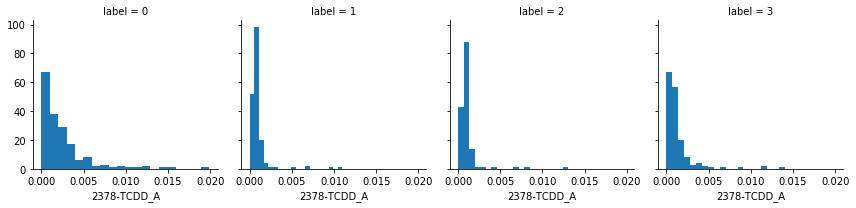

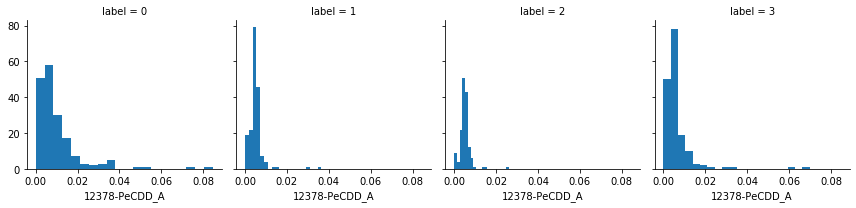

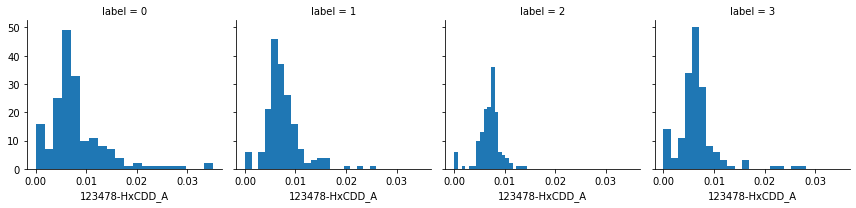

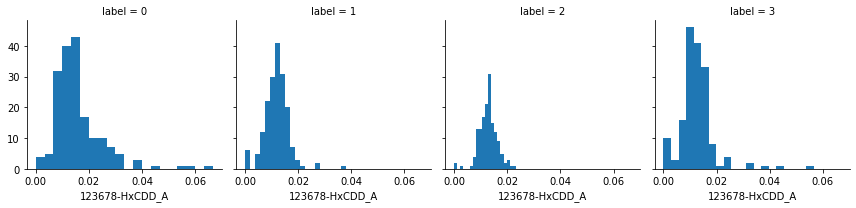

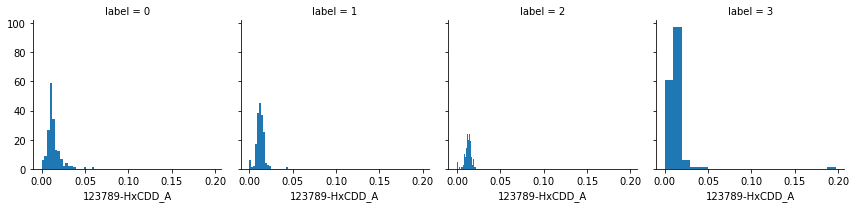

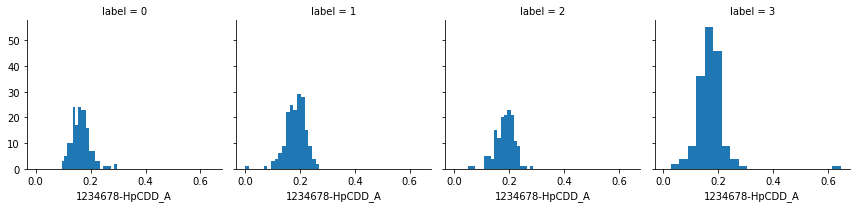

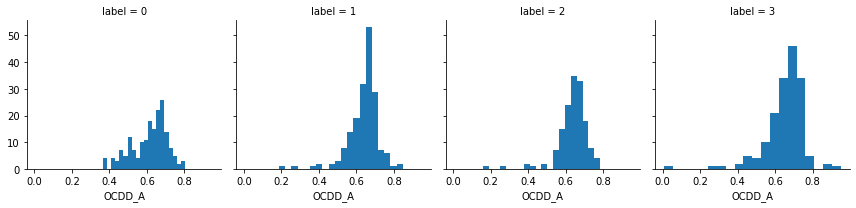

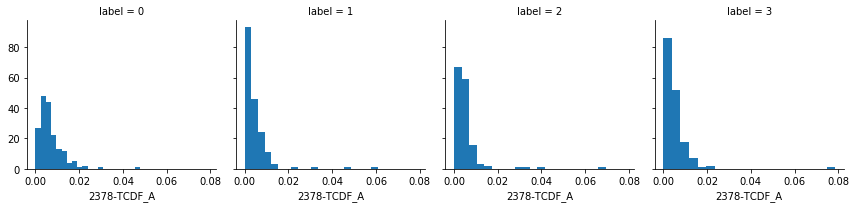

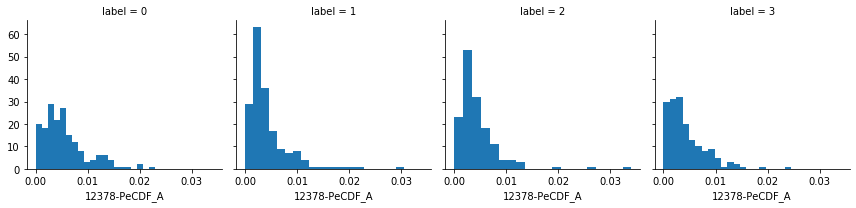

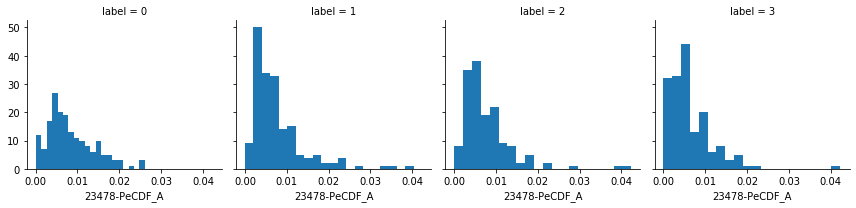

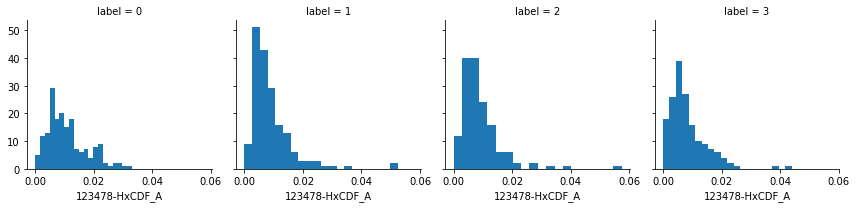

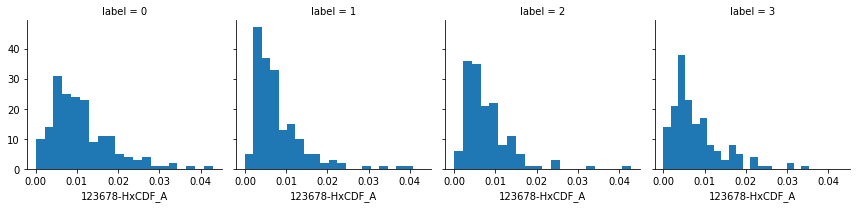

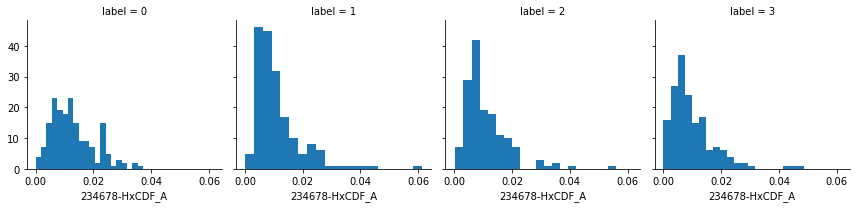

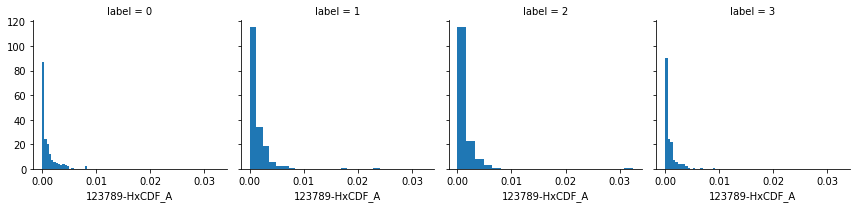

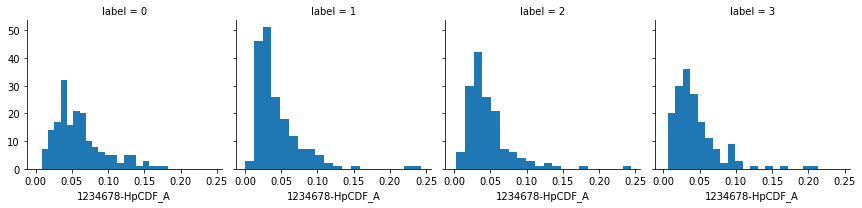

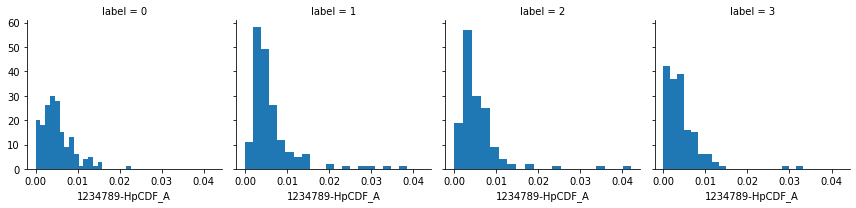

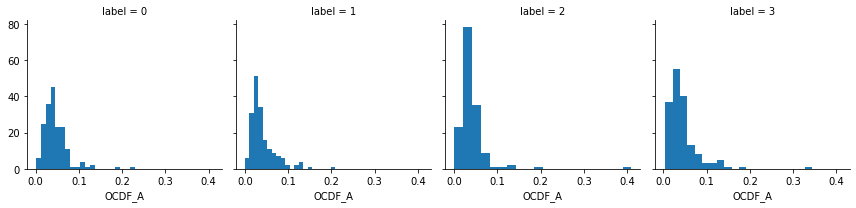

In [8]:
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_season, col='label')
    g.map(plt.hist, i, bins=20)

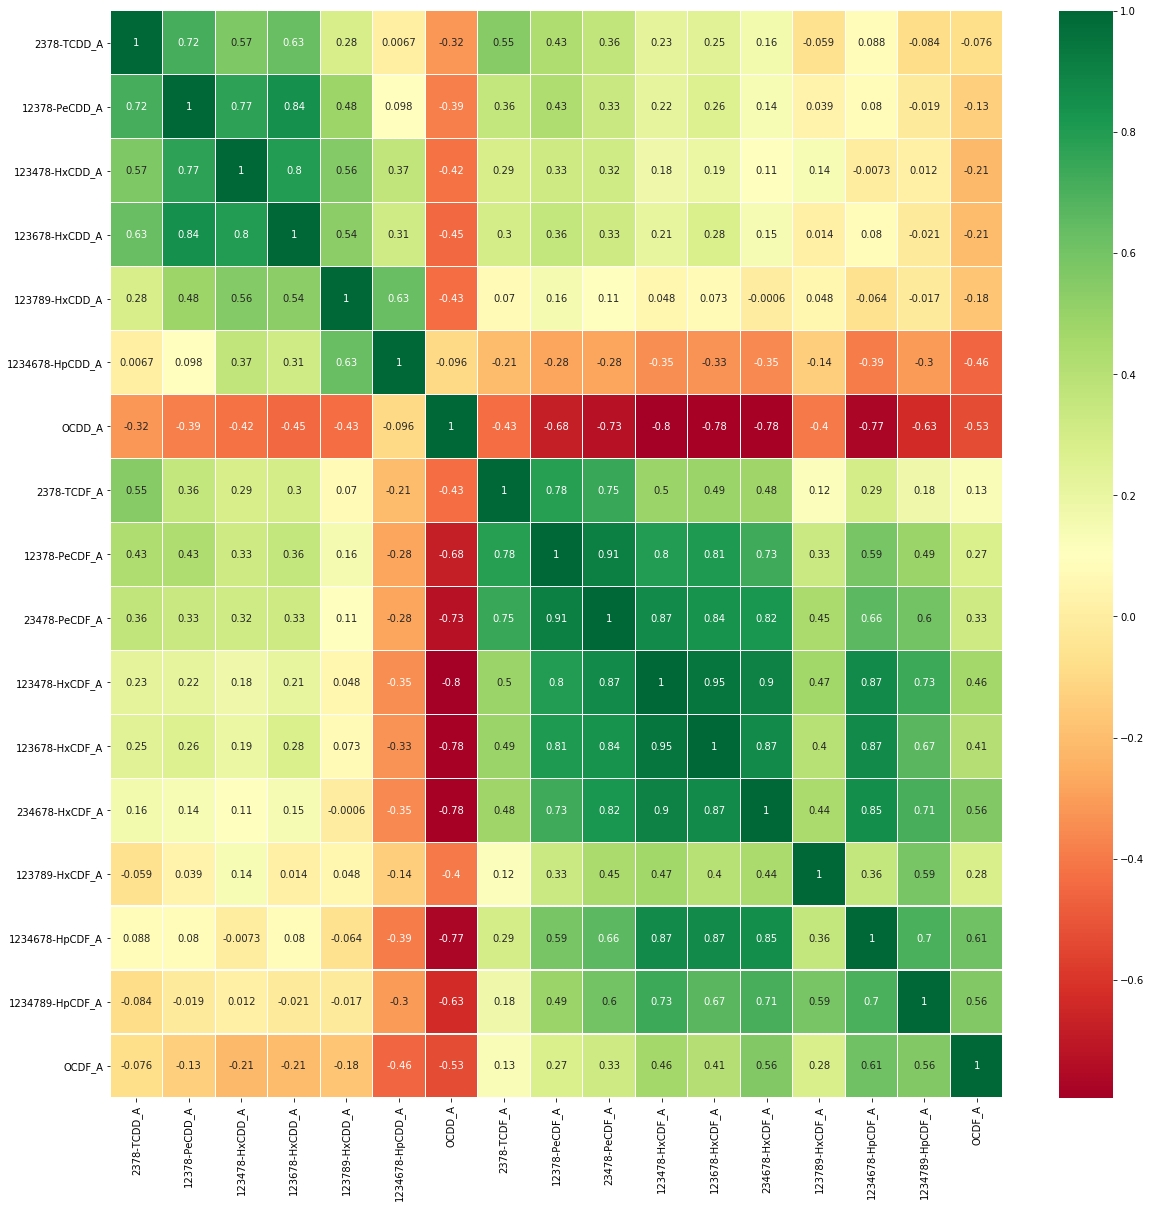

In [9]:
sns.heatmap(data_season[congenere].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

# IV- Classifiers for season

In [10]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

## 1- Normalisation A

In [11]:
train,test=train_test_split(data_season,test_size=0.3,random_state=0,stratify=data_season['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_season[data_season.columns[5:22]]
Y=data_season['label']

{'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3}


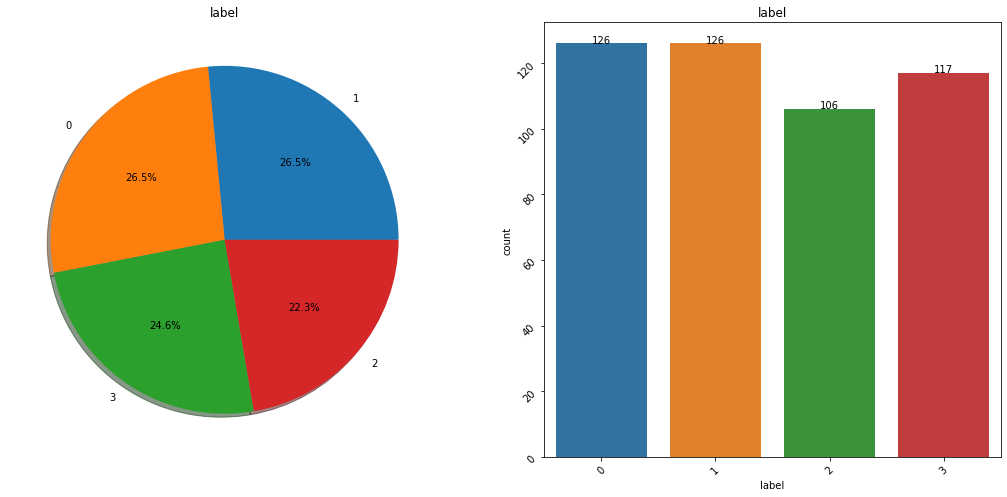

In [12]:
print({'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [13]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.31862745098039214


In [14]:
model=DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.43137254901960786


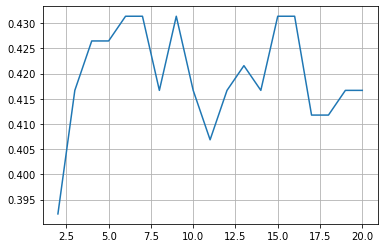

In [15]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [16]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


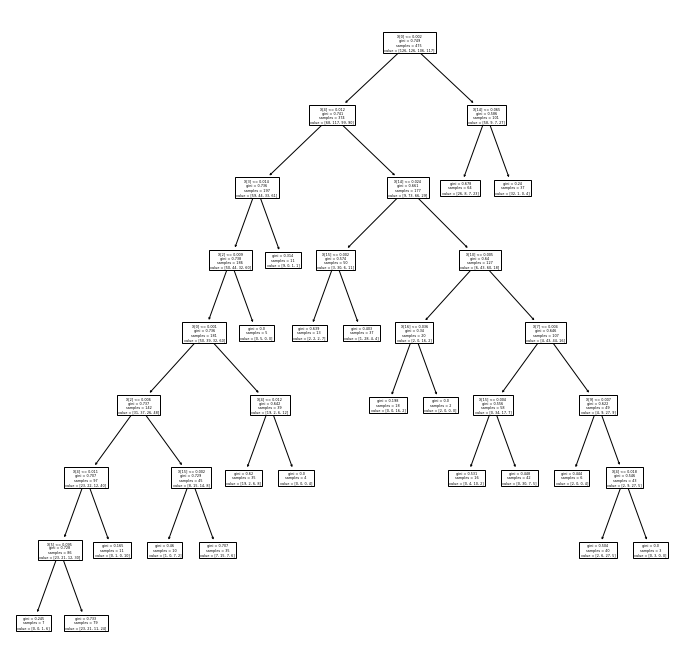

In [17]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

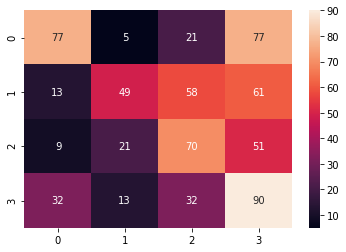

In [18]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [19]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.281449,0.053787
Radial Svm,0.350577,0.058783
Logistic Regression,0.355022,0.064220
KNN,0.366743,0.028021
Decision Tree,0.368159,0.043377
Naive Bayes,0.340338,0.055716
Random Forest,0.437418,0.030828


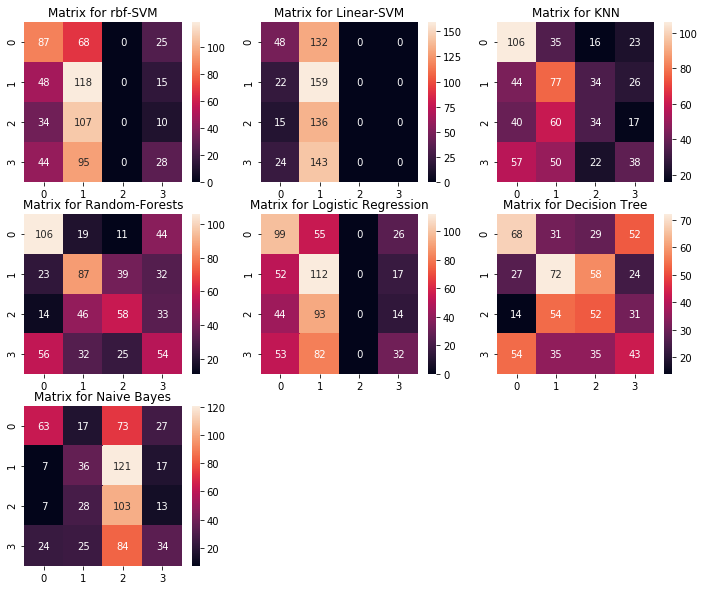

In [20]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 2- Normalisation C:

In [21]:
data_season_C = data_season[data_season.columns[22:40]].copy()
data_season_C.dropna(inplace=True)
data_season_C.reset_index(drop=True, inplace=True)
# data_season_C = data_season_C.dropna(inplace=True)
# data_season_C

In [22]:
train,test=train_test_split(data_season_C,test_size=0.3,random_state=0,stratify=data_season_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_season_C[data_season_C.columns[:17]]
Y=data_season_C['label']

{'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3}


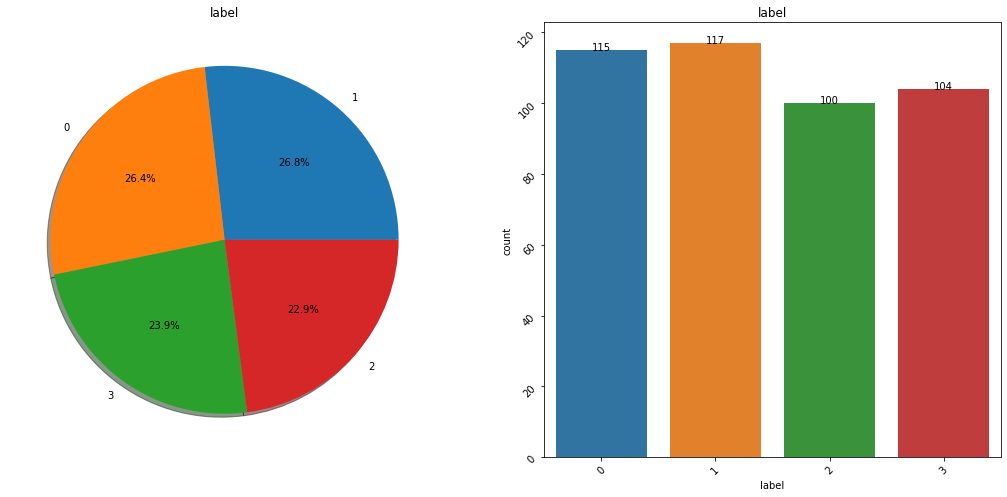

In [23]:
print({'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [24]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.44919786096256686


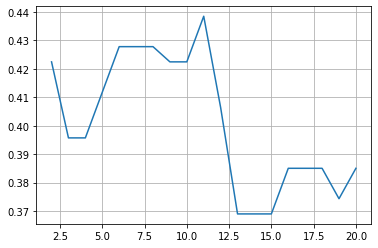

In [25]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [26]:
model=DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.42780748663101603


In [27]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


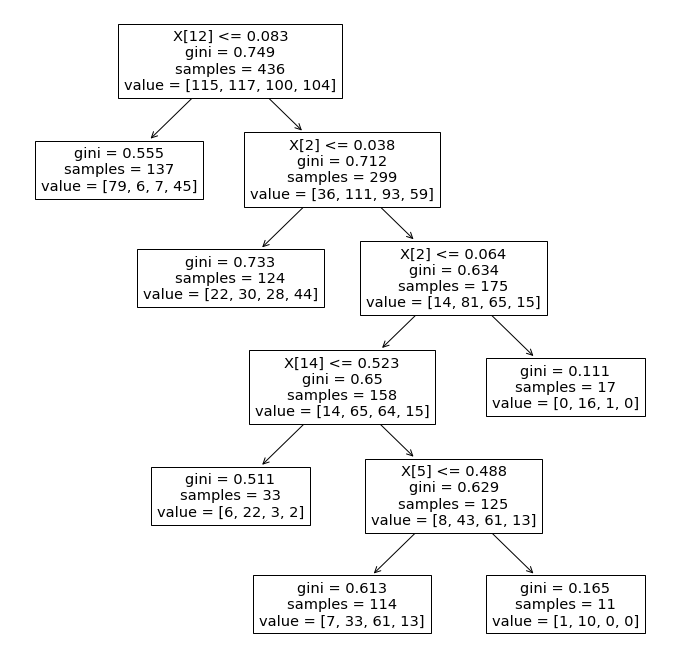

In [28]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

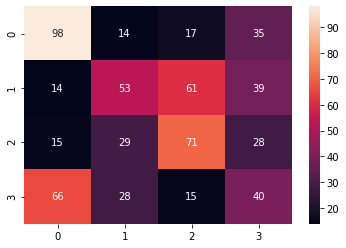

In [29]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [30]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=6),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.391639,0.049550
Radial Svm,0.417290,0.030623
Logistic Regression,0.430129,0.029487
KNN,0.410929,0.043453
Decision Tree,0.409303,0.024156
Naive Bayes,0.417394,0.028622
Random Forest,0.516968,0.065284


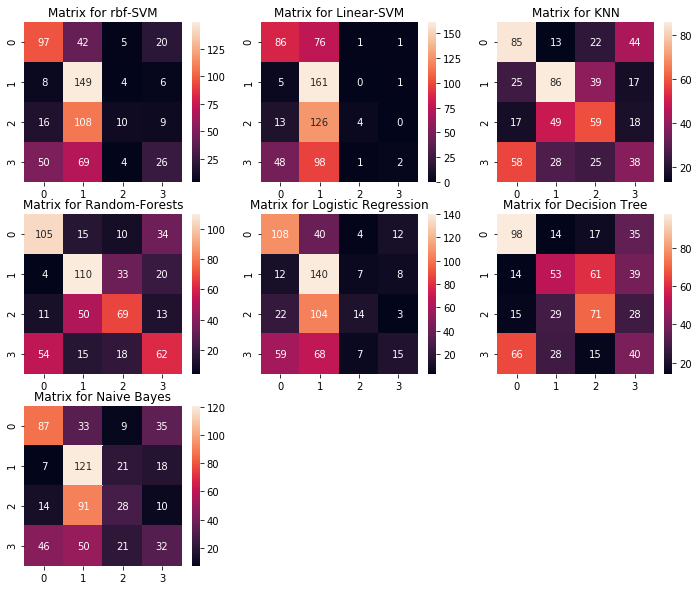

In [31]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

# V- Try to classify by site type all

In [32]:
data_type = data.copy()

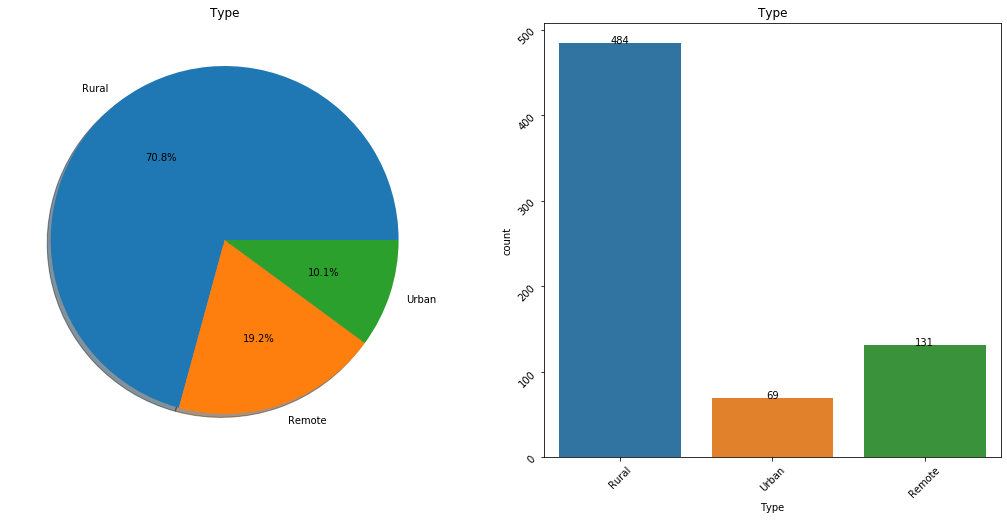

In [33]:
col = 'Type'
f,ax=plt.subplots(1,2,figsize=(18,8))
data_type[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=data_type,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [34]:
data_type['label'] = data_type['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

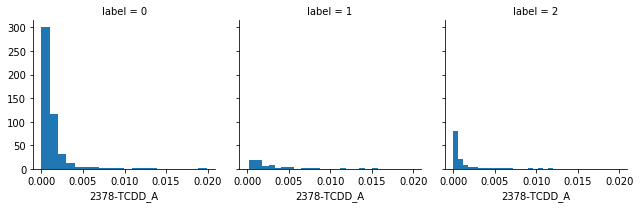

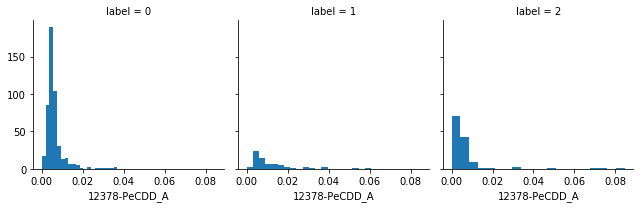

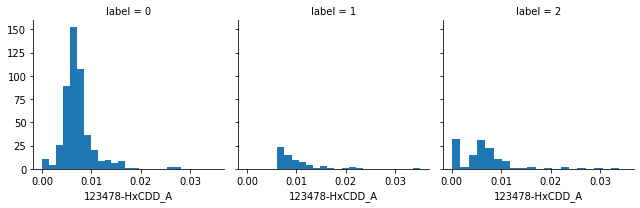

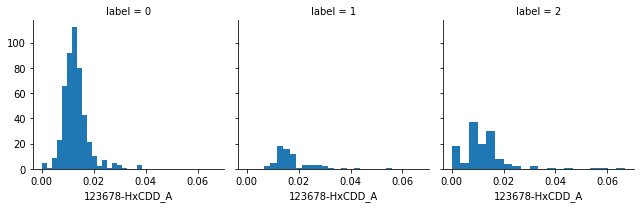

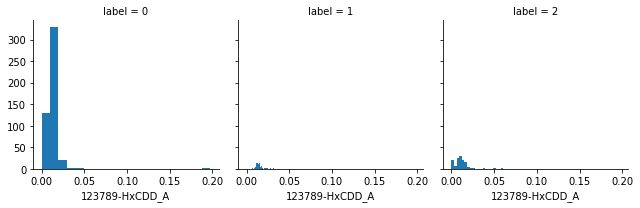

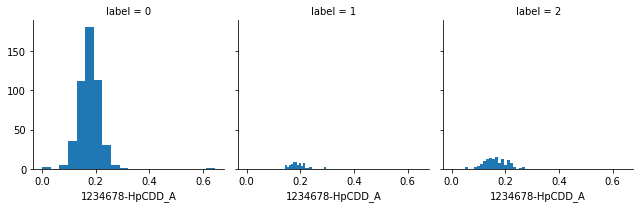

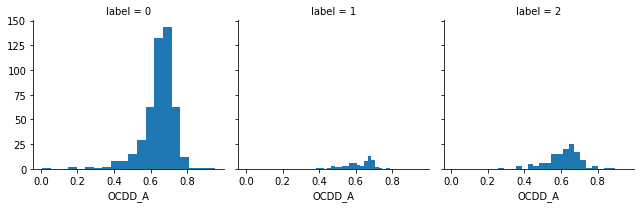

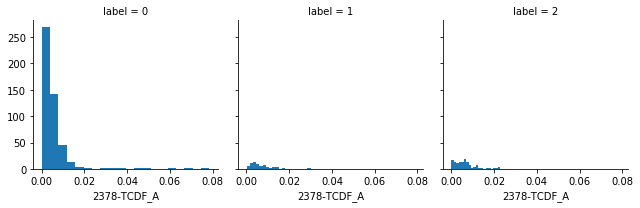

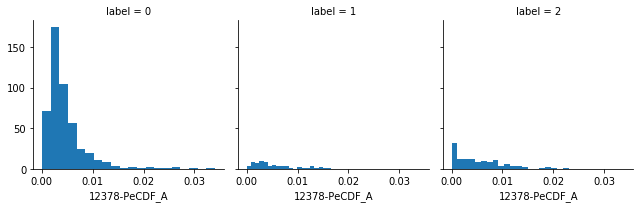

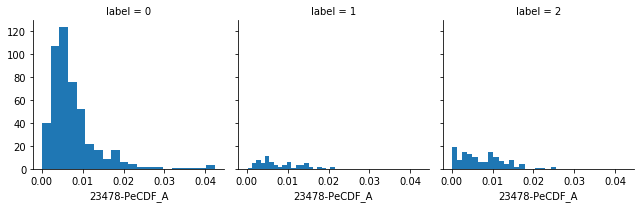

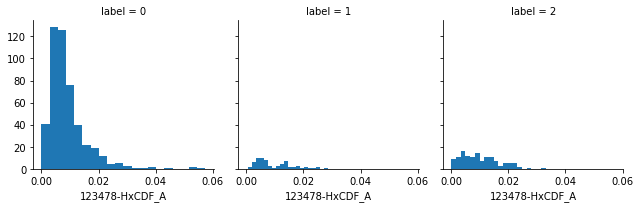

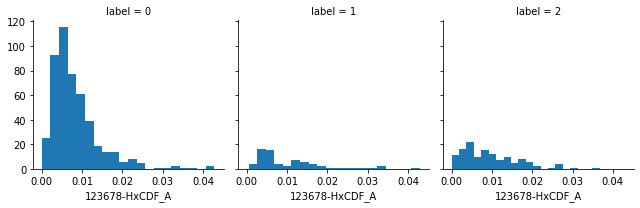

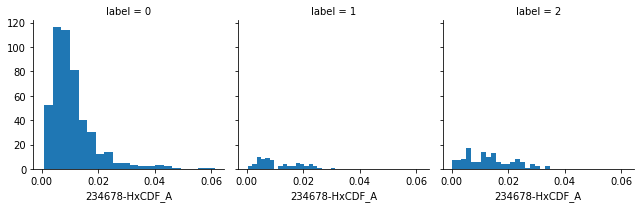

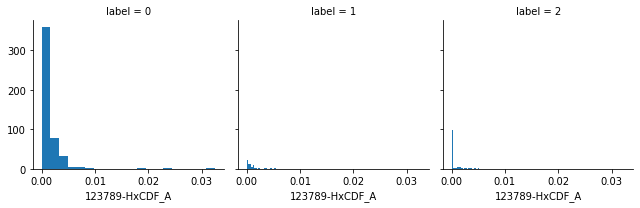

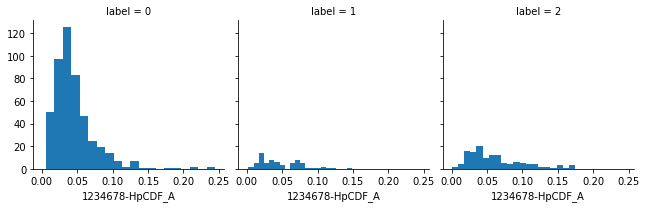

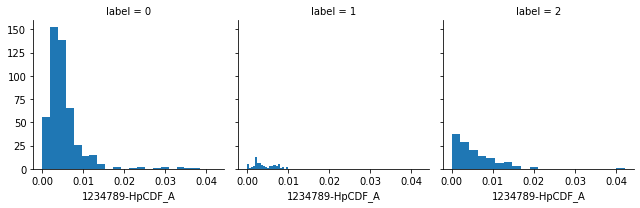

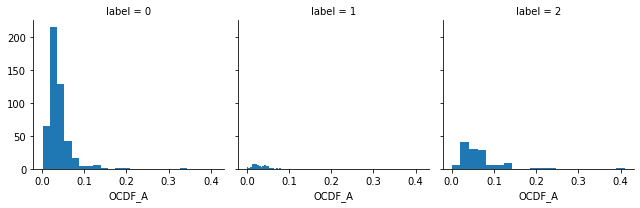

In [35]:
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_type, col='label')
    _= g.map(plt.hist, i, bins=20)
    plt.show()

# VI- Classifiers by type

In [36]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

## 1- Normalisation A

In [37]:
train,test=train_test_split(data_type,test_size=0.3,random_state=0,stratify=data_type['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_season[data_season.columns[5:22]]
Y=data_season['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


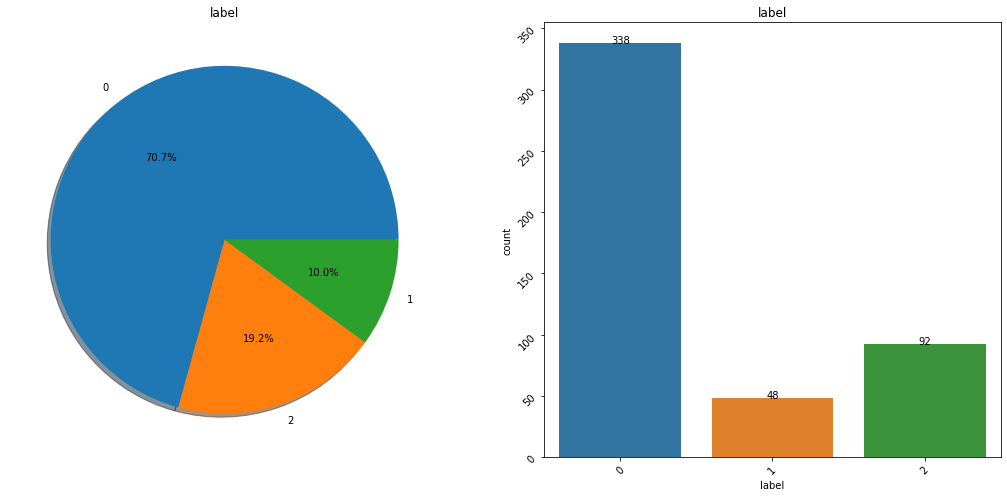

In [38]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [39]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7135922330097088


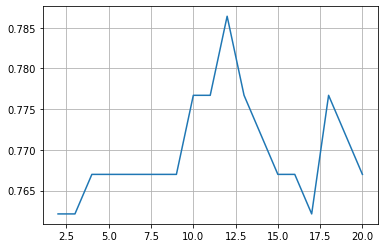

In [40]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [41]:
model=DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7669902912621359


In [42]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


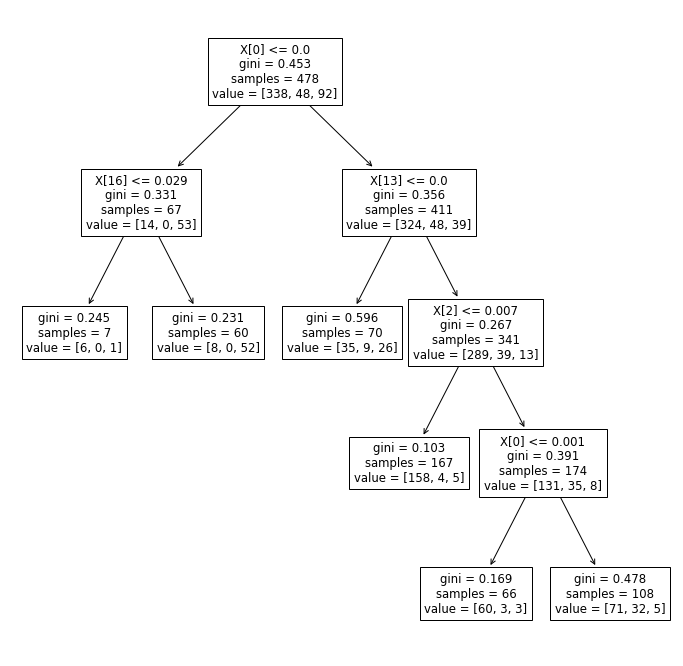

In [43]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

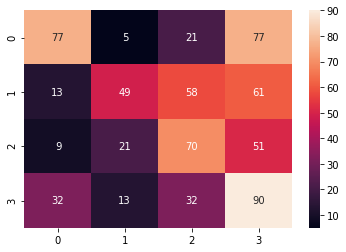

In [44]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [45]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=6),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.281449,0.053787
Radial Svm,0.350577,0.058783
Logistic Regression,0.355022,0.064220
KNN,0.366743,0.028021
Decision Tree,0.412331,0.048667
Naive Bayes,0.340338,0.055716
Random Forest,0.428584,0.033478


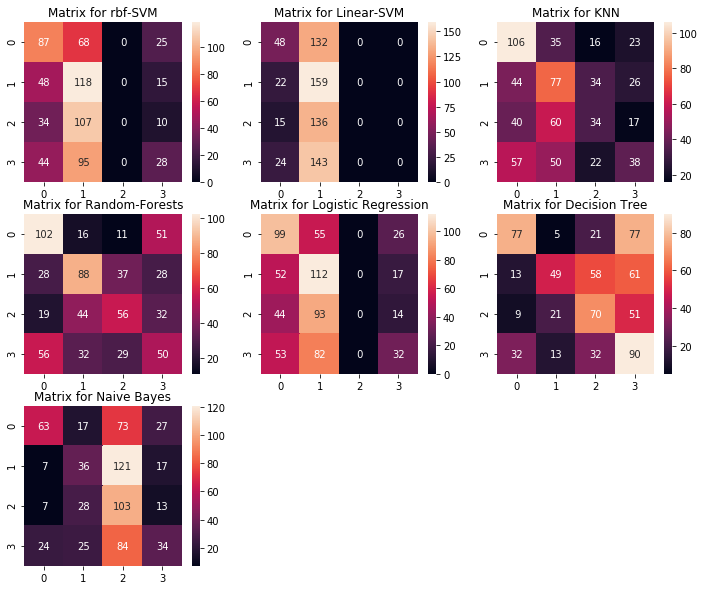

In [46]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 2- Normalisation C:

In [47]:
data_type_C = data_type[data_type.columns[22:40]].copy()
data_type_C.dropna(inplace=True)
data_type_C.reset_index(drop=True, inplace=True)

In [48]:
train,test=train_test_split(data_type_C,test_size=0.3,random_state=0,stratify=data_type_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_C[data_type_C.columns[:17]]
Y=data_type_C['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


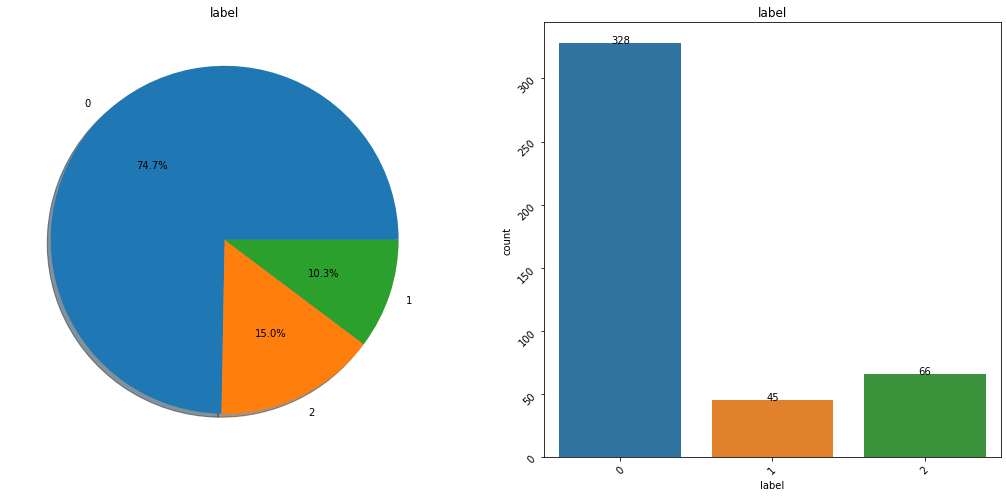

In [49]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7566137566137566


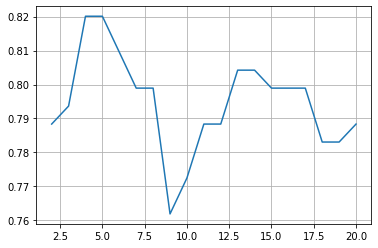

In [51]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [52]:
model=DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8095238095238095


In [53]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


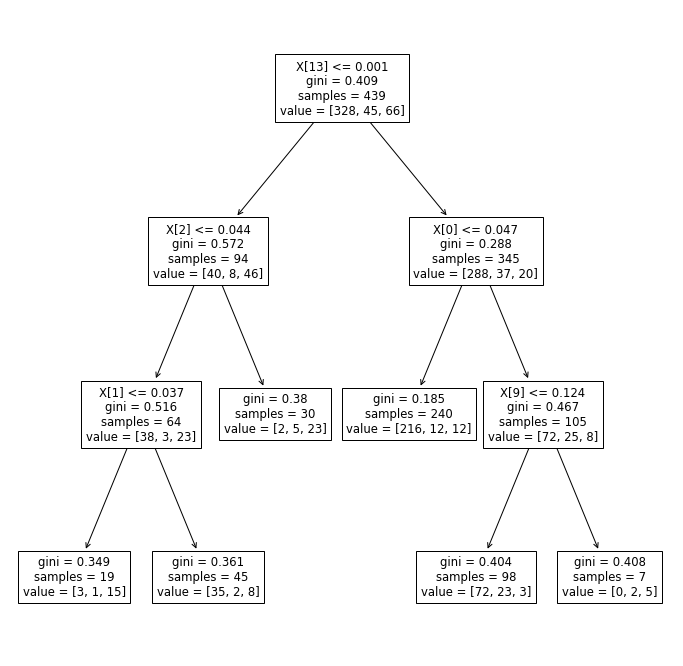

In [54]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

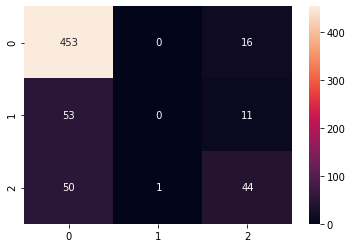

In [55]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [56]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=6),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.746768,0.108410
Radial Svm,0.738806,0.103587
Logistic Regression,0.743594,0.107919
KNN,0.738844,0.065801
Decision Tree,0.722946,0.090646
Naive Bayes,0.654159,0.116919
Random Forest,0.748419,0.081940


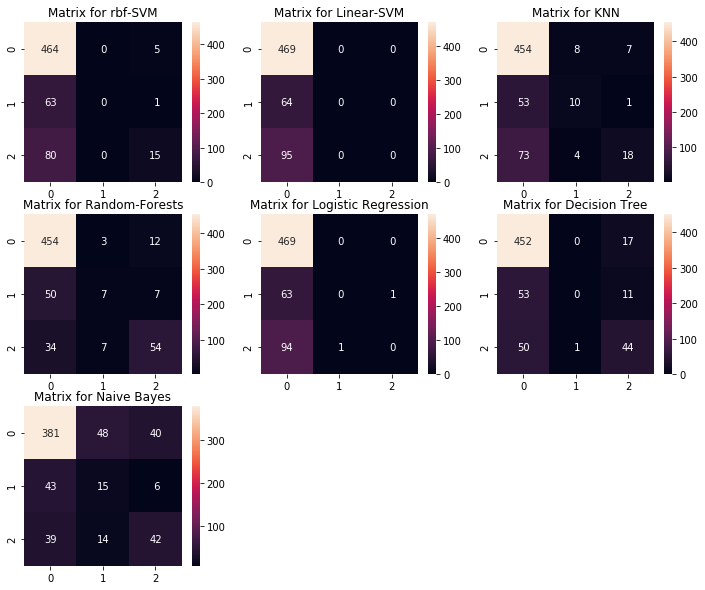

In [57]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

# VII- Try to classify by site type (Remote vs Urban)

In [58]:
data_type_re_u = data.copy()
data_type_re_u = data_type_re_u[data_type_re_u['Type']!='Rural']

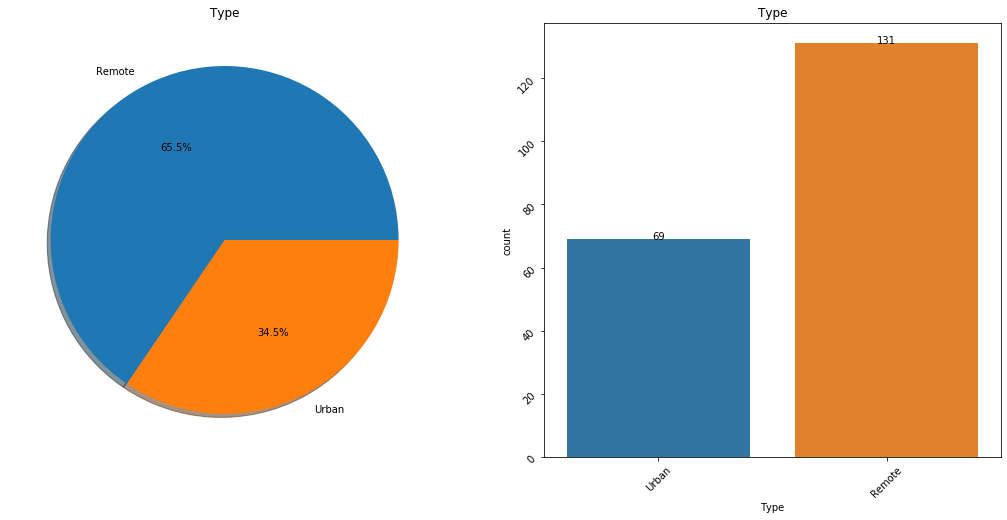

In [59]:
col = 'Type'
f,ax=plt.subplots(1,2,figsize=(18,8))
data_type_re_u[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=data_type_re_u,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [60]:
data_type_re_u['label'] = data_type_re_u['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

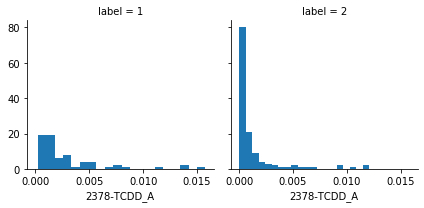

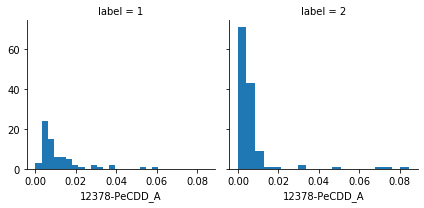

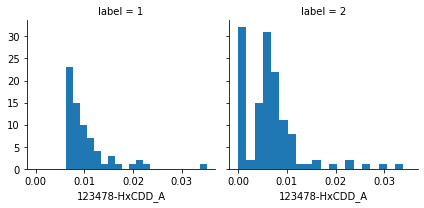

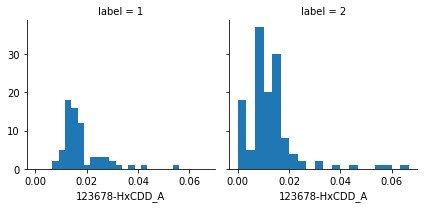

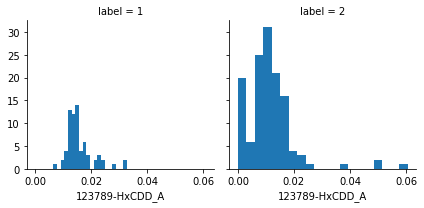

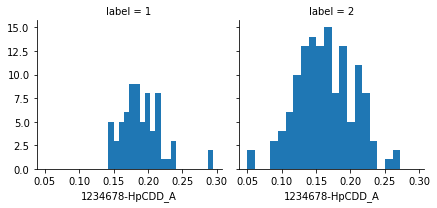

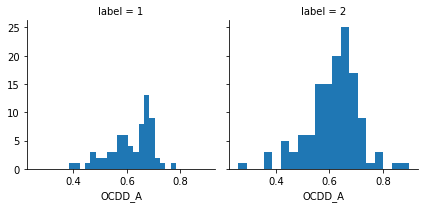

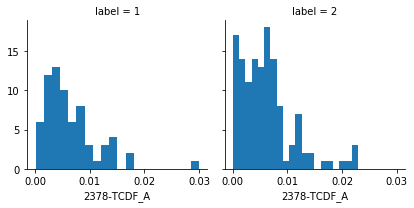

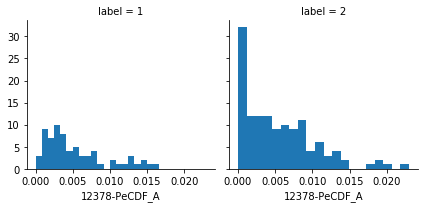

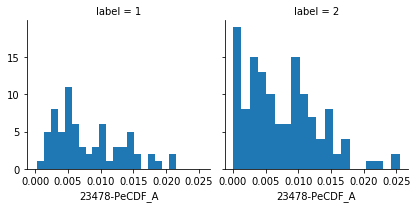

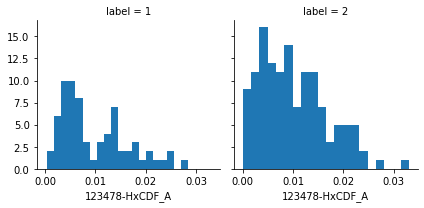

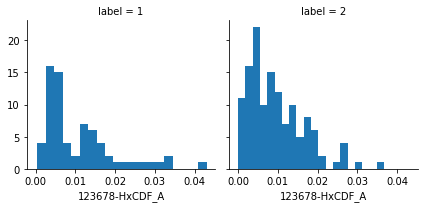

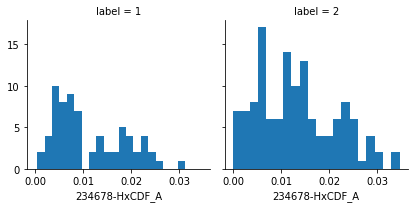

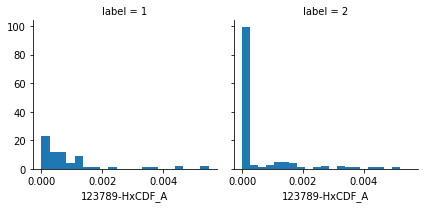

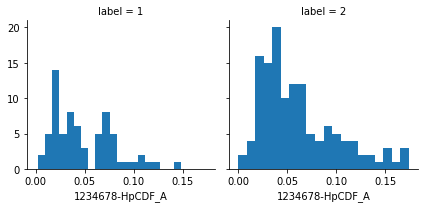

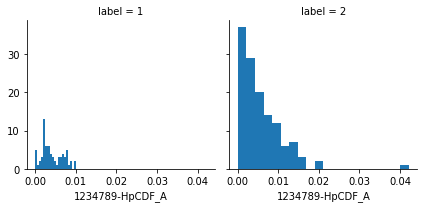

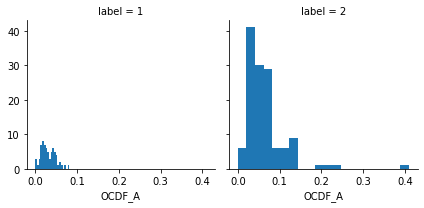

In [61]:
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_type_re_u, col='label')
    _= g.map(plt.hist, i, bins=20)
    plt.show()

# VIII- Classifiers by type

In [62]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

## 1- Normalisation A

In [63]:
train,test=train_test_split(data_type_re_u,test_size=0.3,random_state=0,stratify=data_type_re_u['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_type_re_u[data_type_re_u.columns[5:22]]
Y=data_type_re_u['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


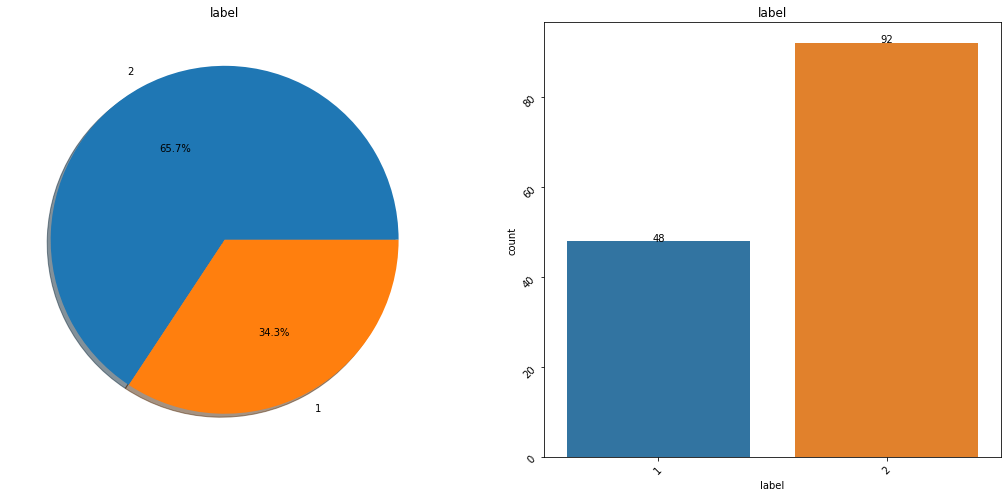

In [64]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [65]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.65


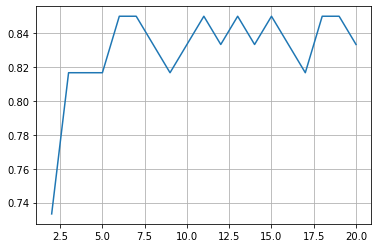

In [66]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [67]:
model=DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.85


In [68]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


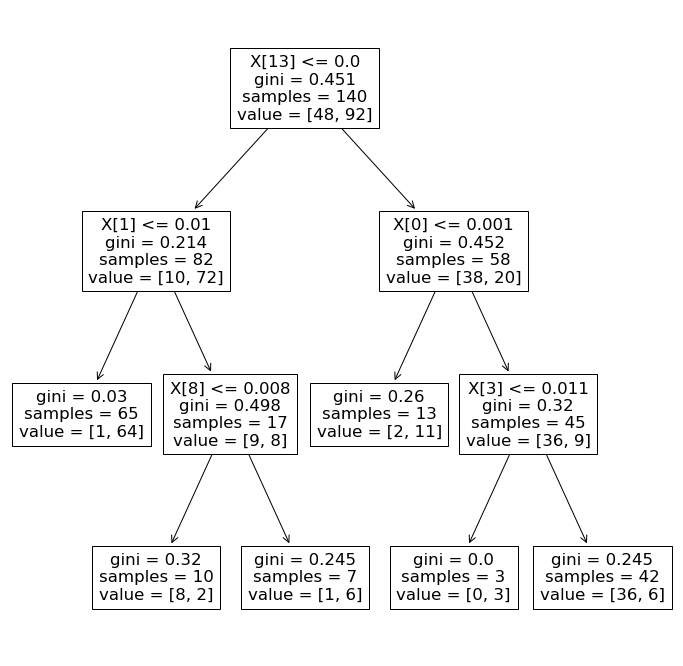

In [69]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

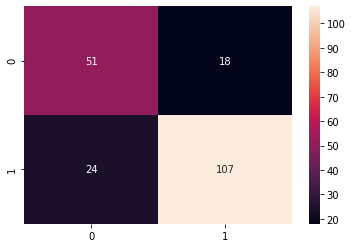

In [70]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [71]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=6),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.655,0.220454
Radial Svm,0.635,0.208327
Logistic Regression,0.655,0.220454
KNN,0.615,0.160935
Decision Tree,0.675,0.167332
Naive Bayes,0.615,0.116833
Random Forest,0.700,0.176777


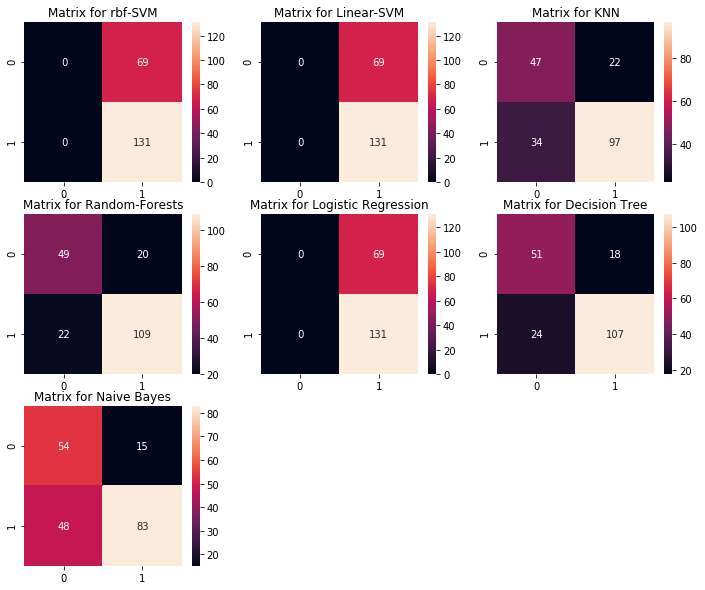

In [72]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=6),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 2- Normalisation C:

In [73]:
data_type_re_u_C = data_type_re_u[data_type_re_u.columns[22:40]].copy()
data_type_re_u_C.dropna(inplace=True)
data_type_re_u_C.reset_index(drop=True, inplace=True)

In [74]:
train,test=train_test_split(data_type_re_u_C,test_size=0.3,random_state=0,stratify=data_type_re_u_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_re_u_C[data_type_re_u_C.columns[:17]]
Y=data_type_re_u_C['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


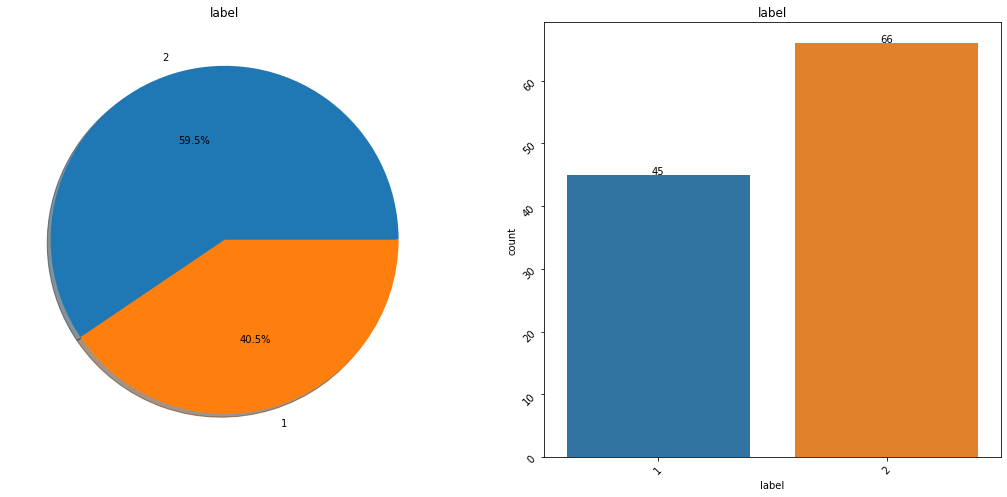

In [75]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [76]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.6041666666666666


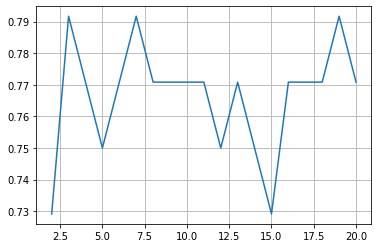

In [77]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [78]:
model=DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7916666666666666


In [79]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


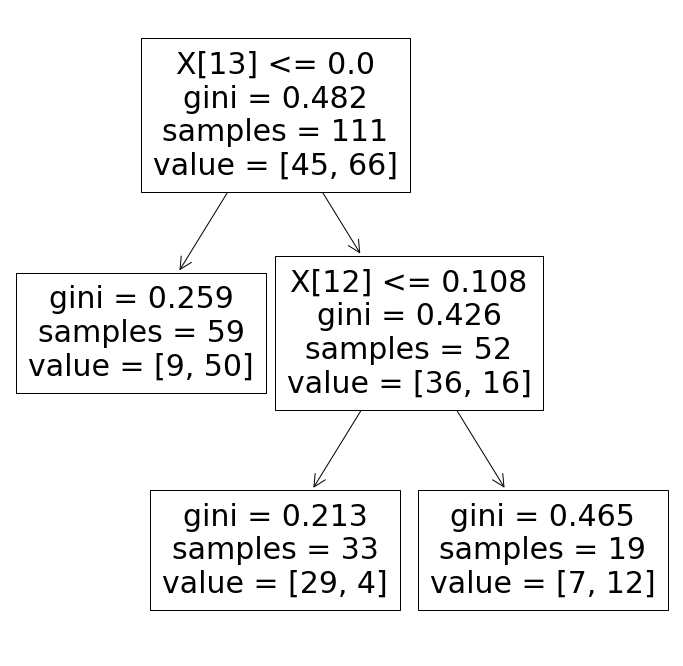

In [80]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

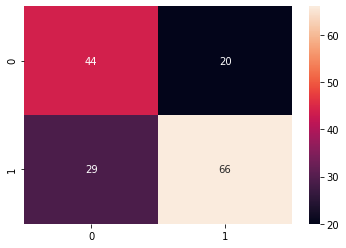

In [81]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [82]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=3),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.417137,0.174431
Radial Svm,0.422984,0.127983
Logistic Regression,0.409476,0.058145
KNN,0.673185,0.128433
Decision Tree,0.715726,0.142518
Naive Bayes,0.602621,0.092429
Random Forest,0.734677,0.140048


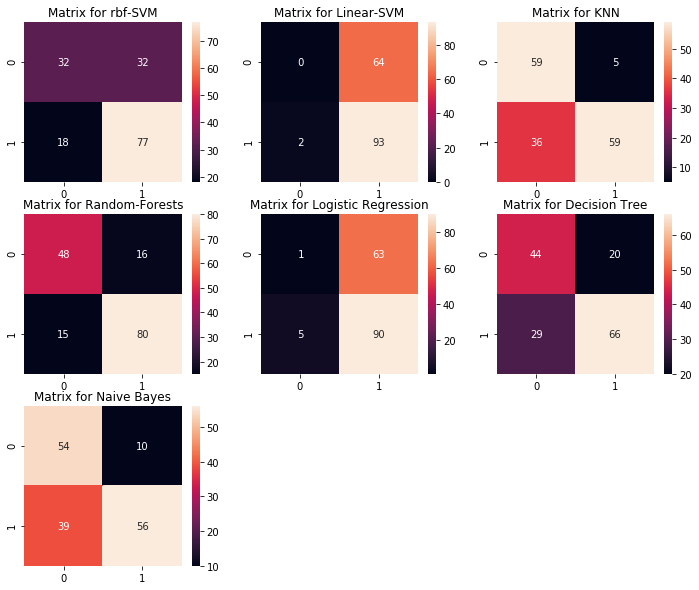

In [83]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

# IX- Try to classify by site type (Rural vs Urban)

In [84]:
data_type_ru_u = data.copy()
data_type_ru_u = data_type_ru_u[data_type_ru_u['Type']!='Remote']

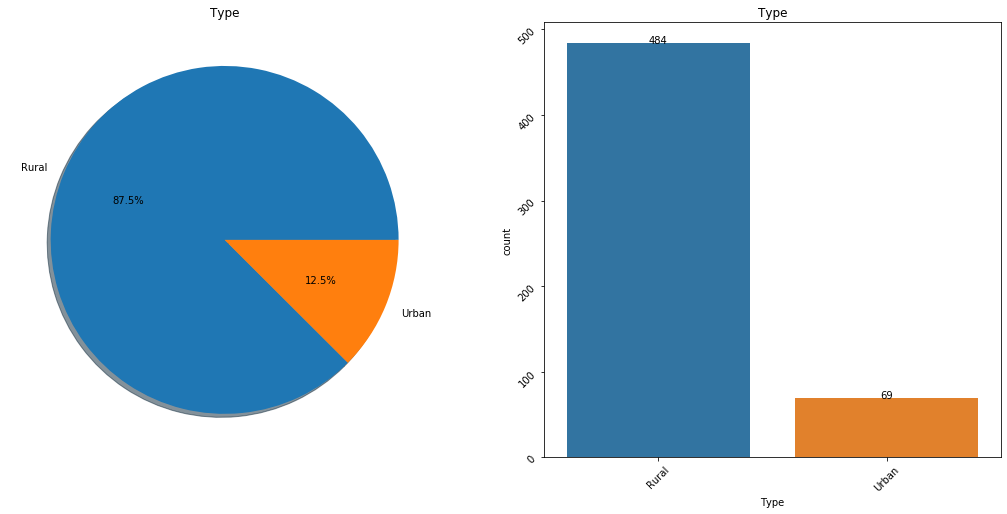

In [85]:
col = 'Type'
f,ax=plt.subplots(1,2,figsize=(18,8))
data_type_ru_u[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=data_type_ru_u,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [86]:
data_type_ru_u['label'] = data_type_ru_u['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

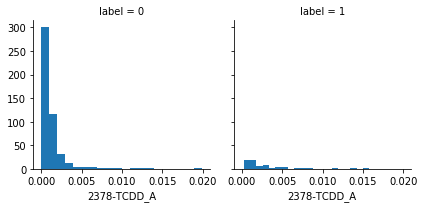

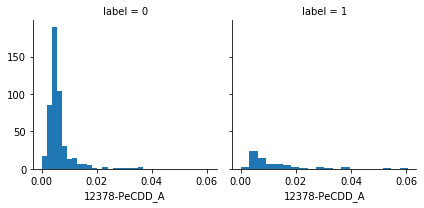

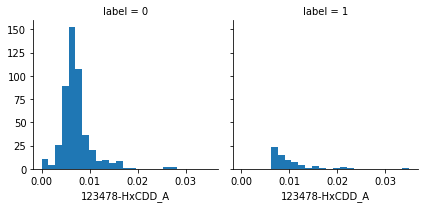

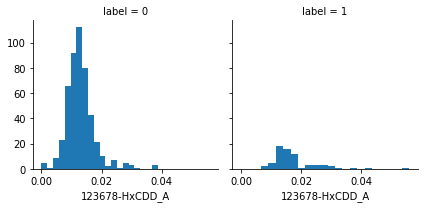

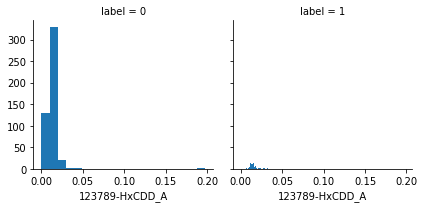

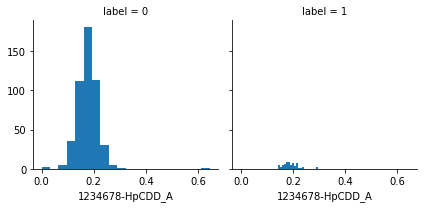

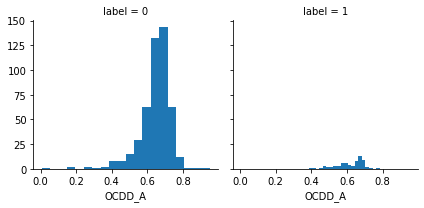

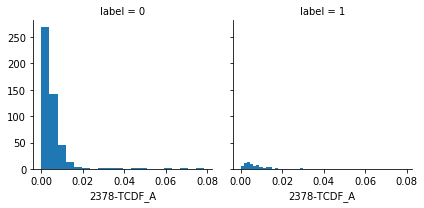

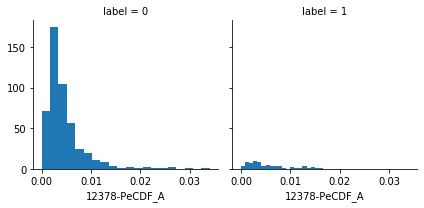

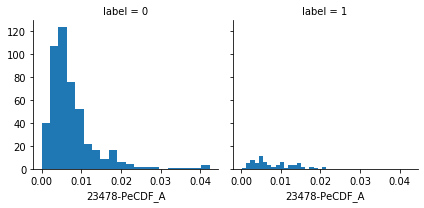

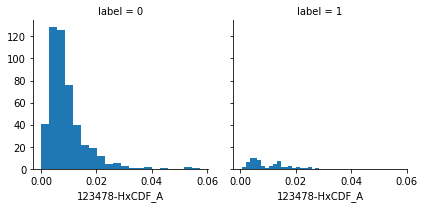

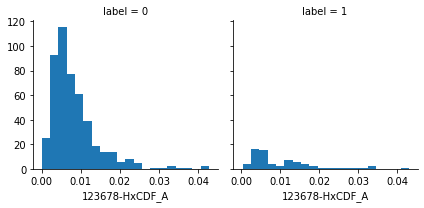

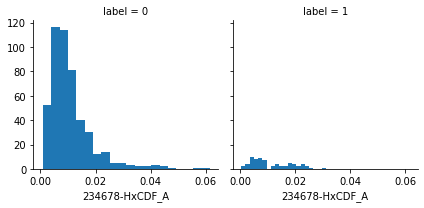

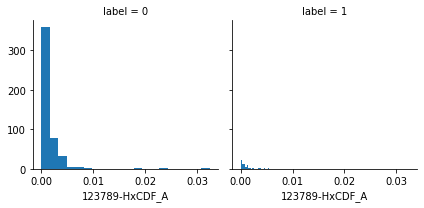

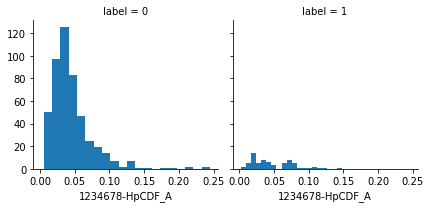

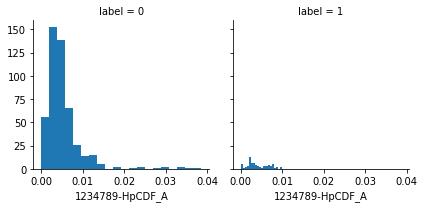

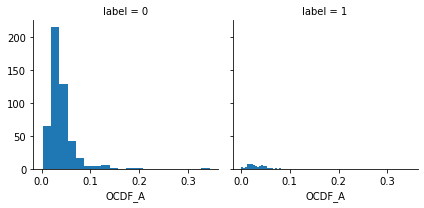

In [87]:
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_type_ru_u, col='label')
    _= g.map(plt.hist, i, bins=20)
    plt.show()

# X- Classifiers by site type (Rural vs Urban)

In [88]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

## 1- Normalisation A

In [89]:
train,test=train_test_split(data_type_ru_u,test_size=0.3,random_state=0,stratify=data_type_ru_u['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_u[data_type_ru_u.columns[5:22]]
Y=data_type_ru_u['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


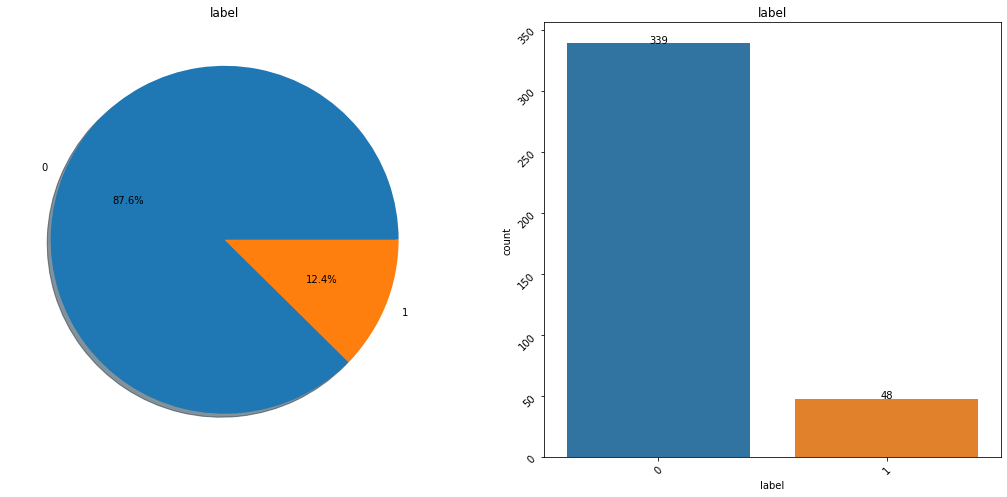

In [90]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [91]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8734939759036144


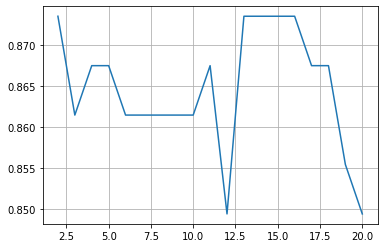

In [92]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [93]:
model=DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8674698795180723


In [94]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


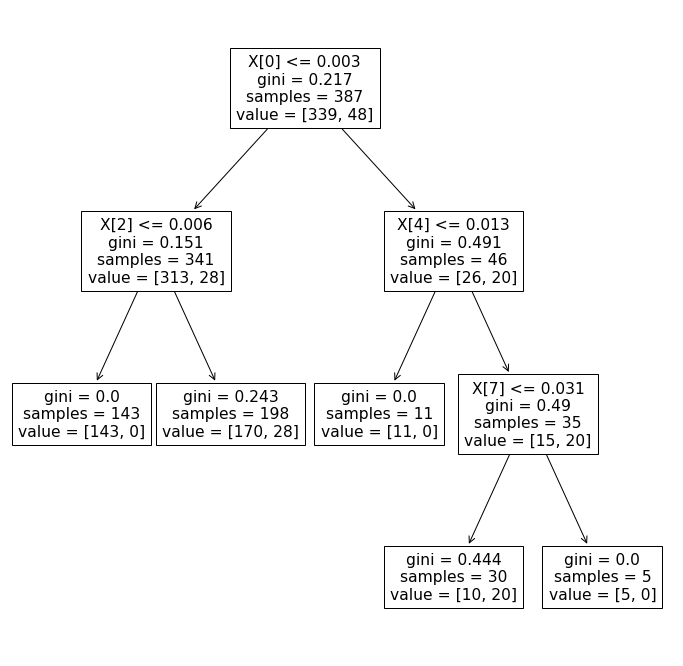

In [95]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

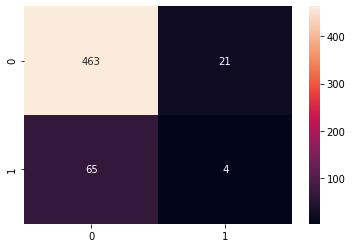

In [96]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=5),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [97]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=5),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.875201,0.043243
Radial Svm,0.875201,0.043243
Logistic Regression,0.875201,0.043243
KNN,0.844488,0.037089
Decision Tree,0.813939,0.055309
Naive Bayes,0.799443,0.072094
Random Forest,0.824701,0.035874


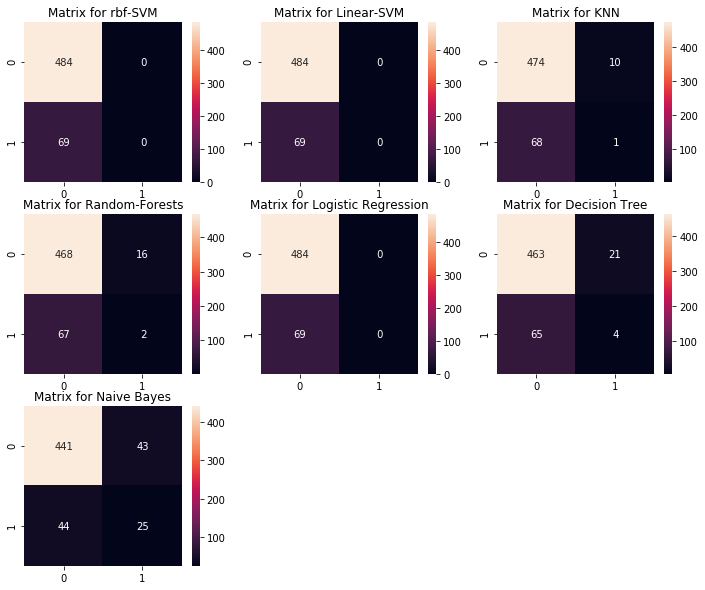

In [98]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=5),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 2- Normalisation A with oversampling

In [99]:
data_type_ru_u = data.copy()
data_type_ru_u = data_type_ru_u[data_type_ru_u['Type']!='Remote']
data_type_ru_u['label'] = data_type_ru_u['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

In [100]:
train,test=train_test_split(data_type_ru_u,test_size=0.3,random_state=0,stratify=data_type_ru_u['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_u[data_type_ru_u.columns[5:22]]
Y=data_type_ru_u['label']

In [101]:
df = pd.concat([train_X,train_Y],axis=1)
df1 = df[df['label']==1]
df0 = df[df['label']==0]
df01 = df0.sample(150).reset_index(drop=True)
undersampled_df = pd.concat([df01,df1],axis=0).reset_index(drop=True)
train_X = undersampled_df[undersampled_df.columns[:17]]
train_Y = undersampled_df[undersampled_df.columns[-1:]]

In [102]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy={1:150})
train_X, train_Y = sm.fit_sample(train_X, train_Y)

In [103]:
# train,test=train_test_split(data_type_ru_u,test_size=0.3,random_state=0,stratify=data_type_ru_u['label'])
# train_X=train[train.columns[5:22]]
# train_Y=train[train.columns[-1:]]
# test_X=test[test.columns[5:22]]
# test_Y=test[test.columns[-1:]]
# X=data_type_ru_u[data_type_ru_u.columns[5:22]]
# Y=data_type_ru_u['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


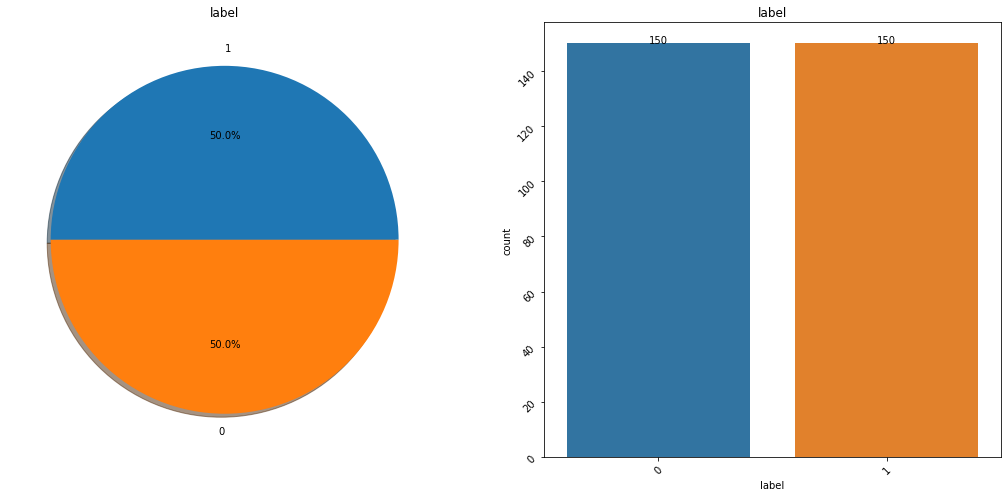

In [104]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [105]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.6746987951807228


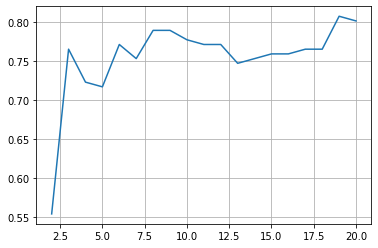

In [106]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [107]:
model=DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7228915662650602


In [108]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


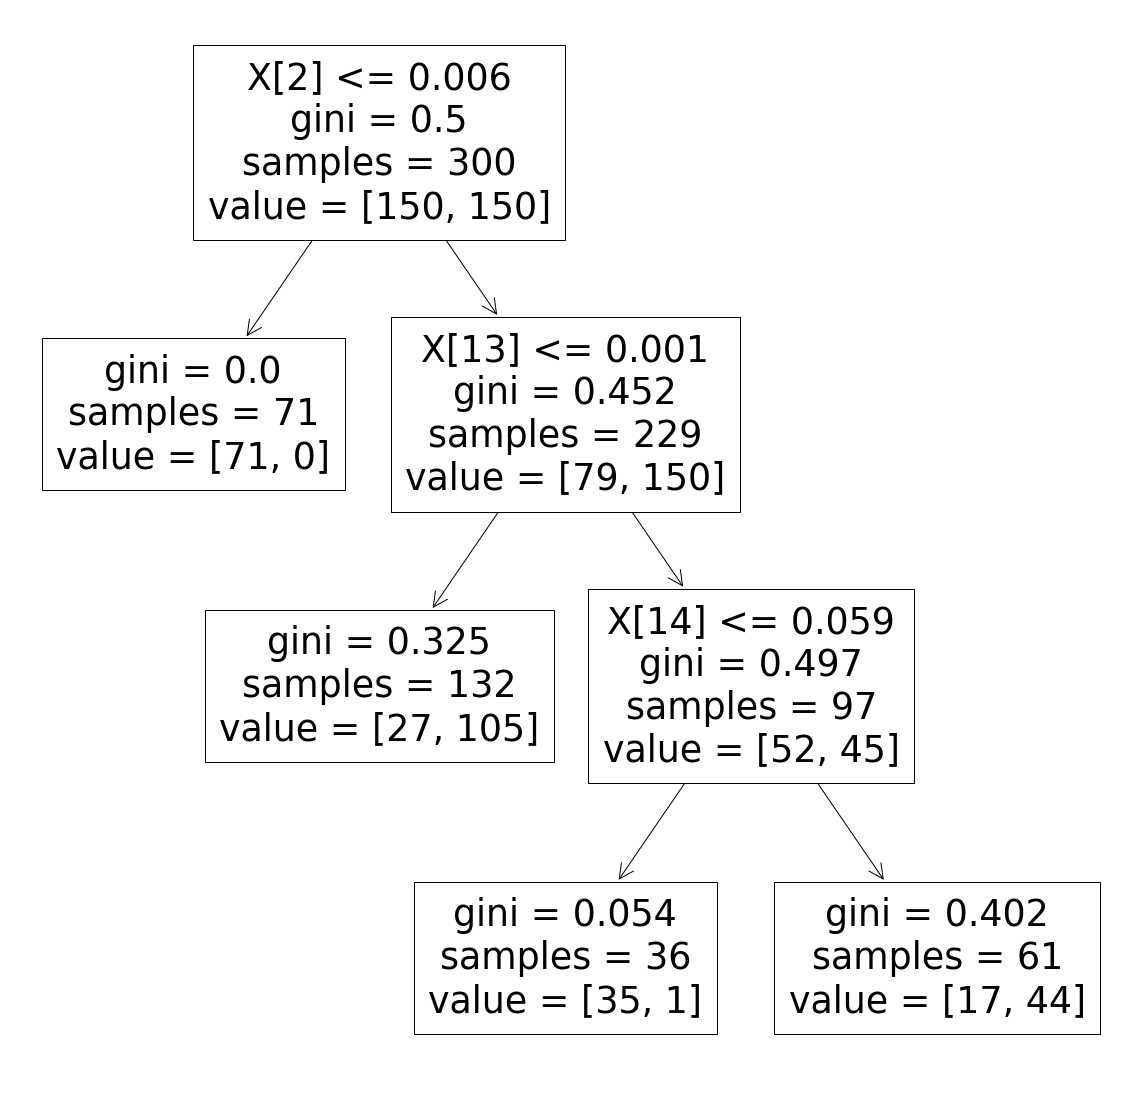

In [109]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
_=tree.plot_tree(model)

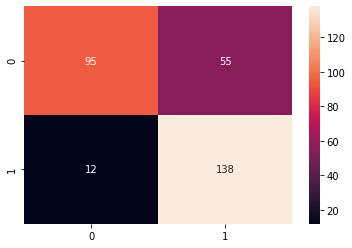

In [110]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),train_X,train_Y,cv=10)
_=sns.heatmap(confusion_matrix(train_Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [111]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=4),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.120000,0.240000
Radial Svm,0.136667,0.265079
Logistic Regression,0.136667,0.273333
KNN,0.660000,0.168852
Decision Tree,0.693333,0.118603
Naive Bayes,0.613333,0.258500
Random Forest,0.870000,0.112250


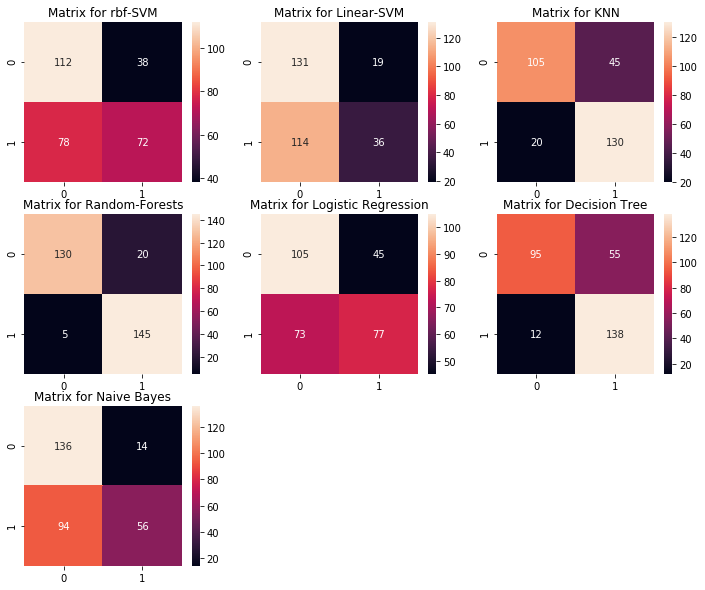

In [112]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 3- Normalisation C:

In [113]:
data_type_ru_u_C = data_type_ru_u[data_type_ru_u.columns[22:40]].copy()
data_type_ru_u_C.dropna(inplace=True)
data_type_ru_u_C.reset_index(drop=True, inplace=True)

In [114]:
train,test=train_test_split(data_type_ru_u_C,test_size=0.3,random_state=0,stratify=data_type_ru_u_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_u_C[data_type_ru_u_C.columns[:17]]
Y=data_type_ru_u_C['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


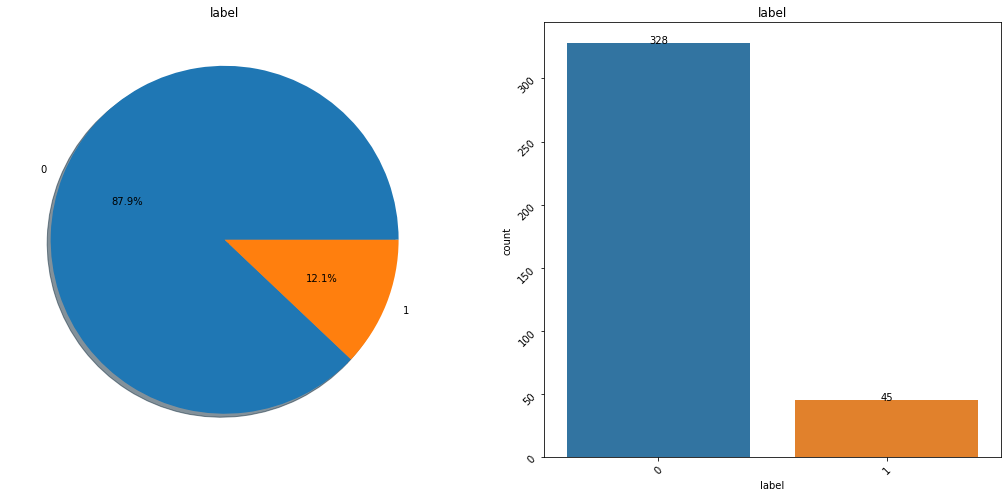

In [115]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [116]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.88125


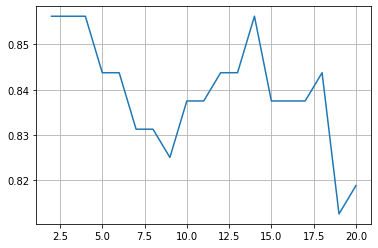

In [117]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [118]:
model=DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.85625


In [119]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


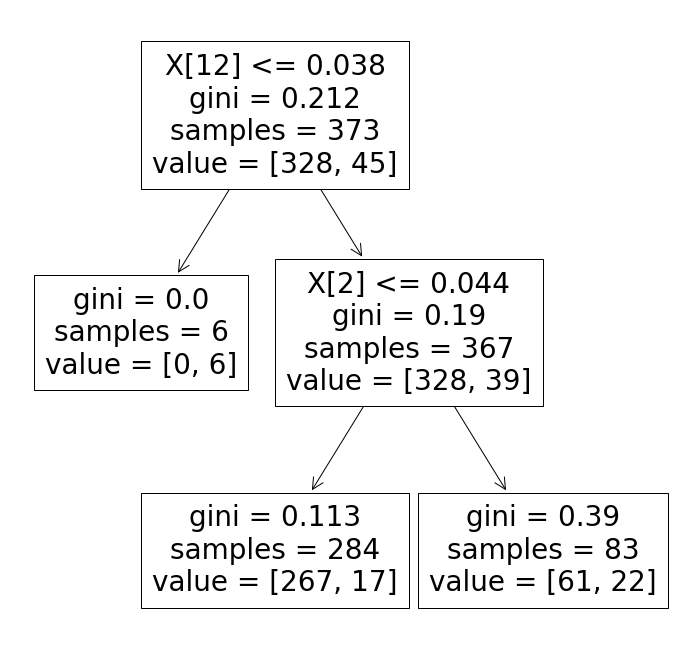

In [120]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

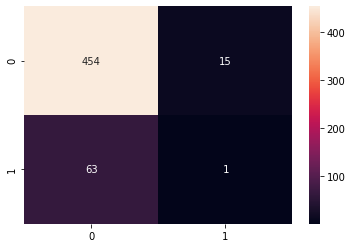

In [121]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [122]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=3),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.879862,0.052828
Radial Svm,0.879862,0.052828
Logistic Regression,0.879862,0.052828
KNN,0.857327,0.044741
Decision Tree,0.851825,0.031864
Naive Bayes,0.765227,0.058305
Random Forest,0.887445,0.047293


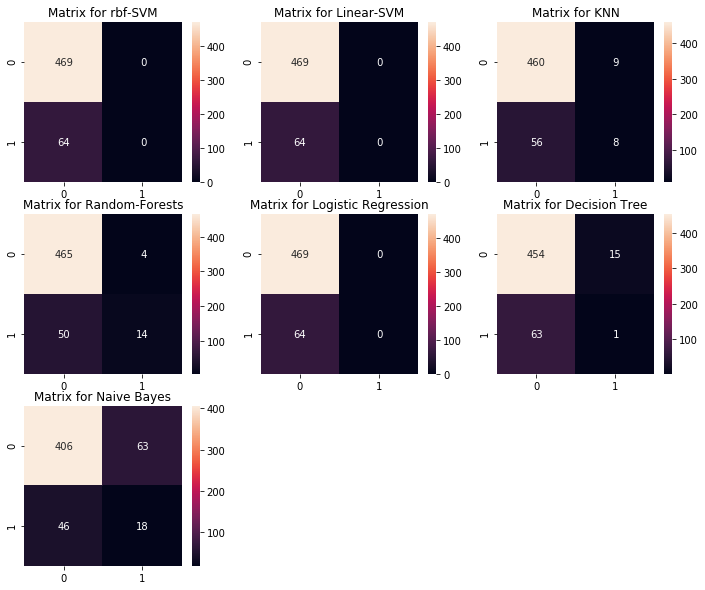

In [123]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 4- Normalisation C with oversampling

In [124]:
data_type_ru_u_C = data_type_ru_u[data_type_ru_u.columns[22:40]].copy()
data_type_ru_u_C.dropna(inplace=True)
data_type_ru_u_C.reset_index(drop=True, inplace=True)

In [125]:
train,test=train_test_split(data_type_ru_u_C,test_size=0.3,random_state=0,stratify=data_type_ru_u_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_u_C[data_type_ru_u_C.columns[:17]]
Y=data_type_ru_u_C['label']

In [126]:
df = pd.concat([train_X,train_Y],axis=1)
df1 = df[df['label']==1]
df0 = df[df['label']==0]
df01 = df0.sample(150).reset_index(drop=True)
undersampled_df = pd.concat([df01,df1],axis=0).reset_index(drop=True)
train_X = undersampled_df[undersampled_df.columns[:17]]
train_Y = undersampled_df[undersampled_df.columns[-1:]]

In [127]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy={1:150})
train_X, train_Y = sm.fit_sample(train_X, train_Y)

{'Rural': 0, 'Urban': 1, 'Remote': 2}


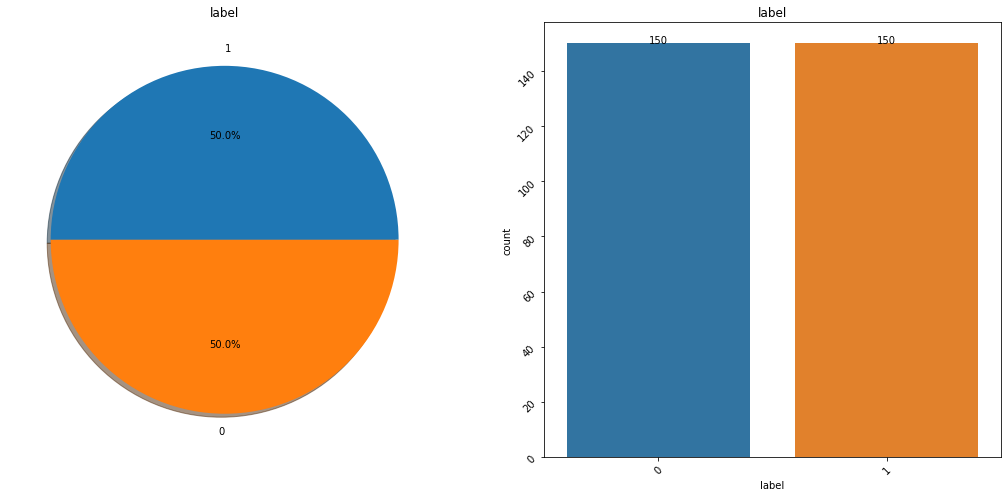

In [128]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [129]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7125


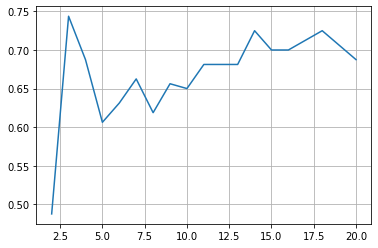

In [130]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [131]:
model=DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.6875


In [132]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


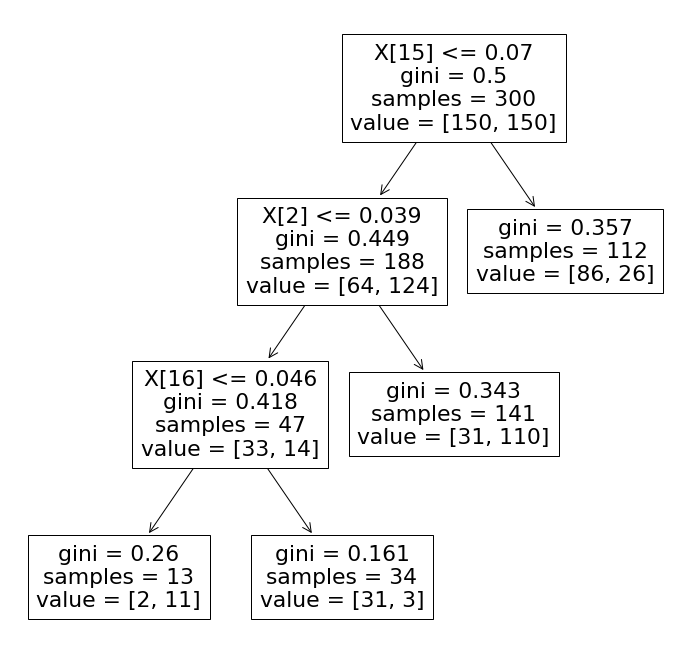

In [133]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

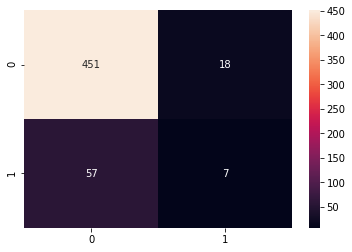

In [134]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [135]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=4),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.879862,0.052828
Radial Svm,0.879862,0.052828
Logistic Regression,0.879862,0.052828
KNN,0.857327,0.044741
Decision Tree,0.825410,0.047949
Naive Bayes,0.765227,0.058305
Random Forest,0.879898,0.048235


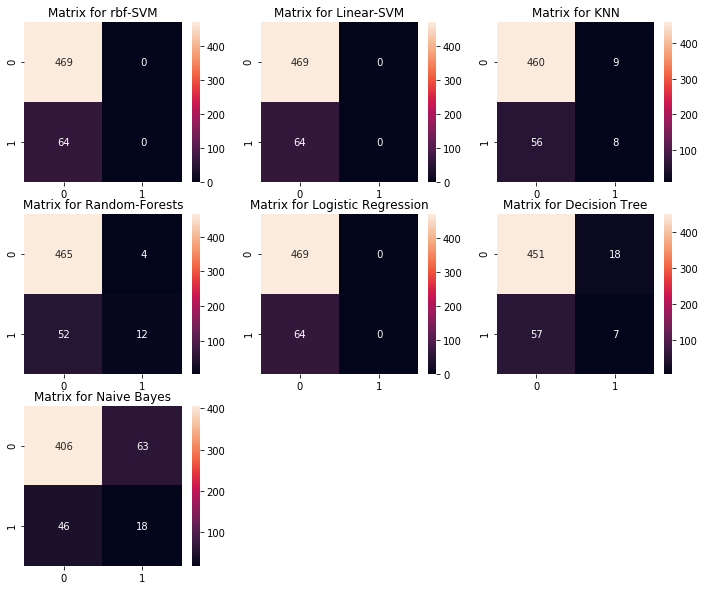

In [136]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

# XI- Try to classify by site type (Rural vs Remote)

In [137]:
data_type_ru_re = data.copy()
data_type_ru_re = data_type_ru_re[data_type_ru_re['Type']!='Urban']

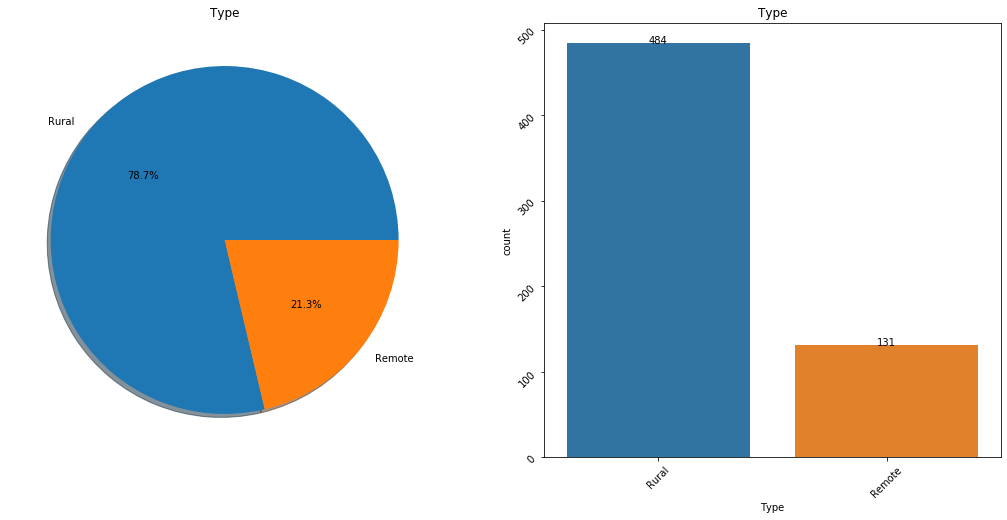

In [138]:
col = 'Type'
f,ax=plt.subplots(1,2,figsize=(18,8))
data_type_ru_re[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=data_type_ru_re,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [139]:
data_type_ru_re['label'] = data_type_ru_re['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

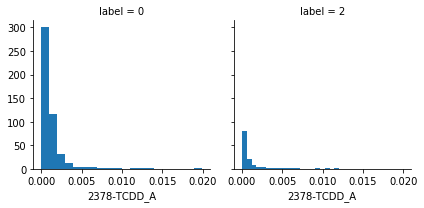

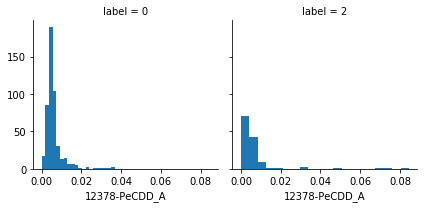

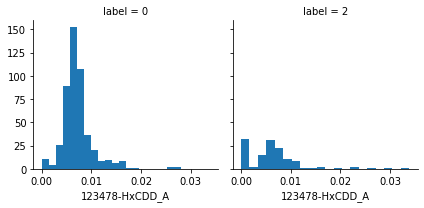

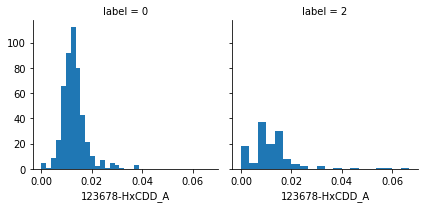

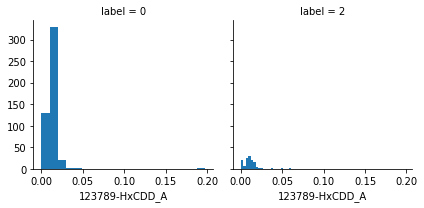

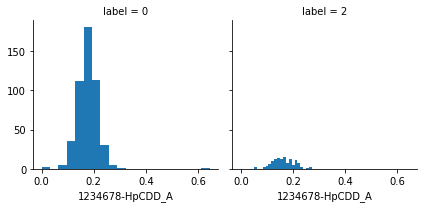

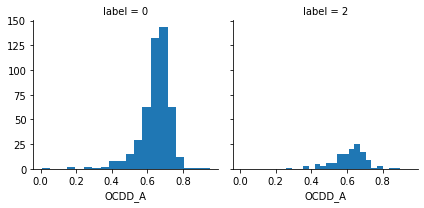

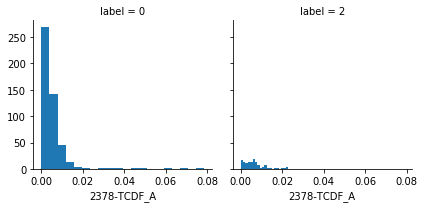

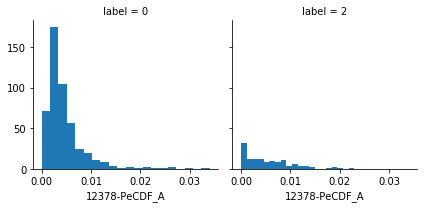

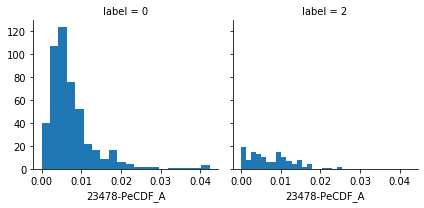

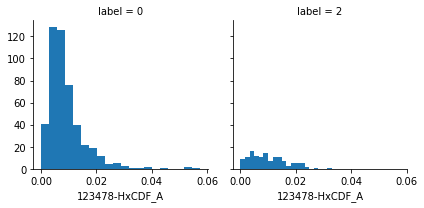

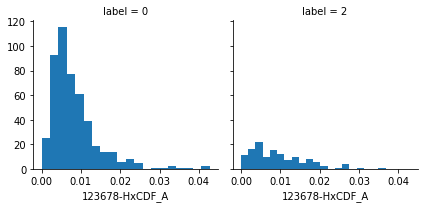

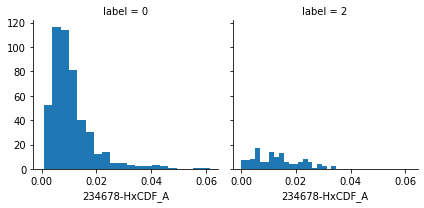

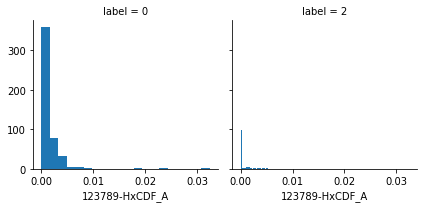

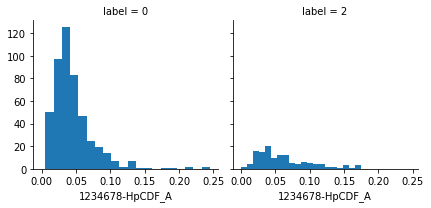

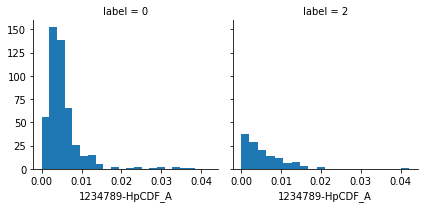

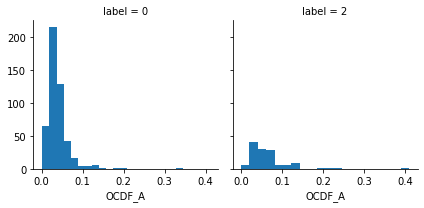

In [140]:
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_type_ru_re, col='label')
    _= g.map(plt.hist, i, bins=20)
    plt.show()

# X- Classifiers by site type (Rural vs Remote)

In [141]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

## 1- Normalisation A

In [142]:
train,test=train_test_split(data_type_ru_re,test_size=0.3,random_state=0,stratify=data_type_ru_re['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_re[data_type_ru_re.columns[5:22]]
Y=data_type_ru_re['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


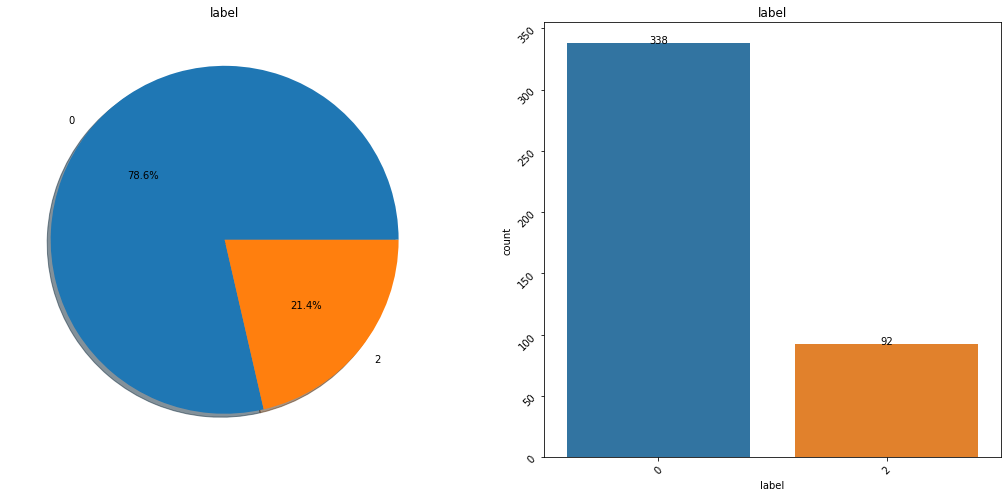

In [143]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [144]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7891891891891892


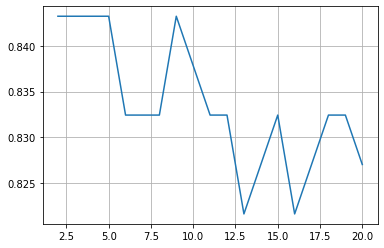

In [145]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [146]:
model=DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8432432432432433


In [147]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


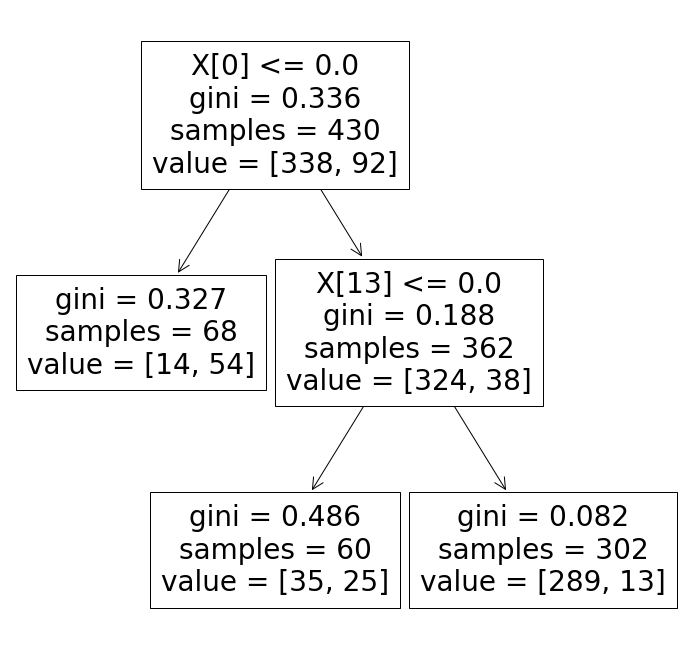

In [148]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

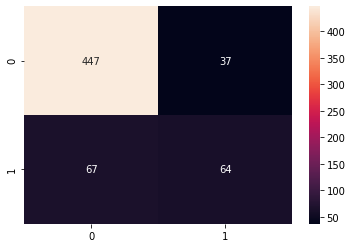

In [149]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [150]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=3),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.786992,0.132538
Radial Svm,0.786992,0.132538
Logistic Regression,0.786992,0.132538
KNN,0.783740,0.119995
Decision Tree,0.817886,0.075675
Naive Bayes,0.783740,0.144395
Random Forest,0.845528,0.090533


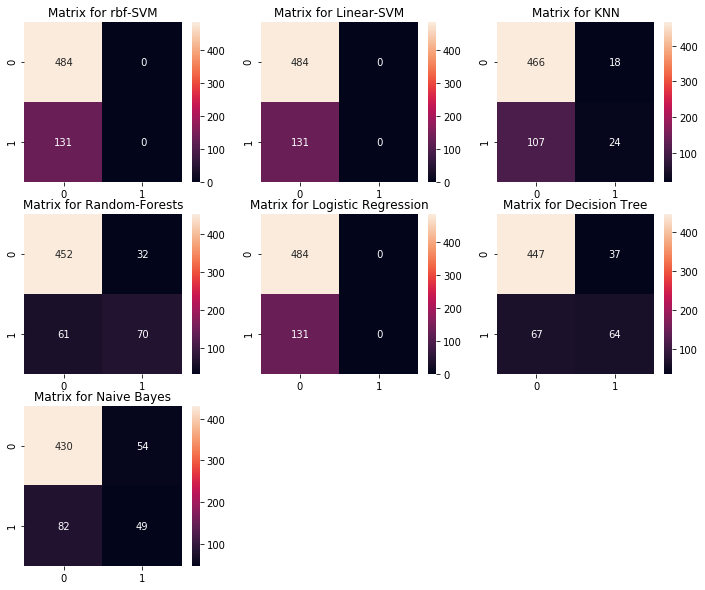

In [151]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=3),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 2- Normalisation A with oversampling

In [152]:
data_type_ru_re = data.copy()
data_type_ru_re = data_type_ru_re[data_type_ru_re['Type']!='Urban']
data_type_ru_re['label'] = data_type_ru_re['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

In [153]:
train,test=train_test_split(data_type_ru_re,test_size=0.3,random_state=0,stratify=data_type_ru_re['label'])
train_X=train[train.columns[5:22]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[5:22]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_re[data_type_ru_re.columns[5:22]]
Y=data_type_ru_re['label']

In [154]:
df = pd.concat([train_X,train_Y],axis=1)
df1 = df[df['label']==2]
df0 = df[df['label']==0]
df01 = df0.sample(150).reset_index(drop=True)
undersampled_df = pd.concat([df01,df1],axis=0).reset_index(drop=True)
train_X = undersampled_df[undersampled_df.columns[:17]]
train_Y = undersampled_df[undersampled_df.columns[-1:]]

In [155]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy={2:150})
train_X, train_Y = sm.fit_sample(train_X, train_Y)

In [156]:
# train,test=train_test_split(data_type_ru_u,test_size=0.3,random_state=0,stratify=data_type_ru_u['label'])
# train_X=train[train.columns[5:22]]
# train_Y=train[train.columns[-1:]]
# test_X=test[test.columns[5:22]]
# test_Y=test[test.columns[-1:]]
# X=data_type_ru_u[data_type_ru_u.columns[5:22]]
# Y=data_type_ru_u['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


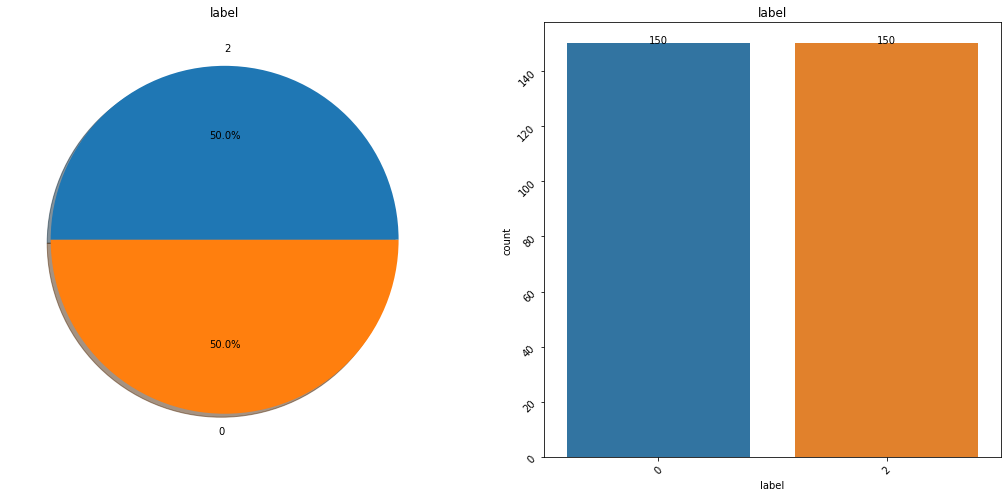

In [157]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [158]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.6864864864864865


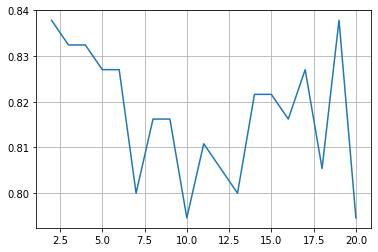

In [159]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [160]:
model=DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.827027027027027


In [161]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


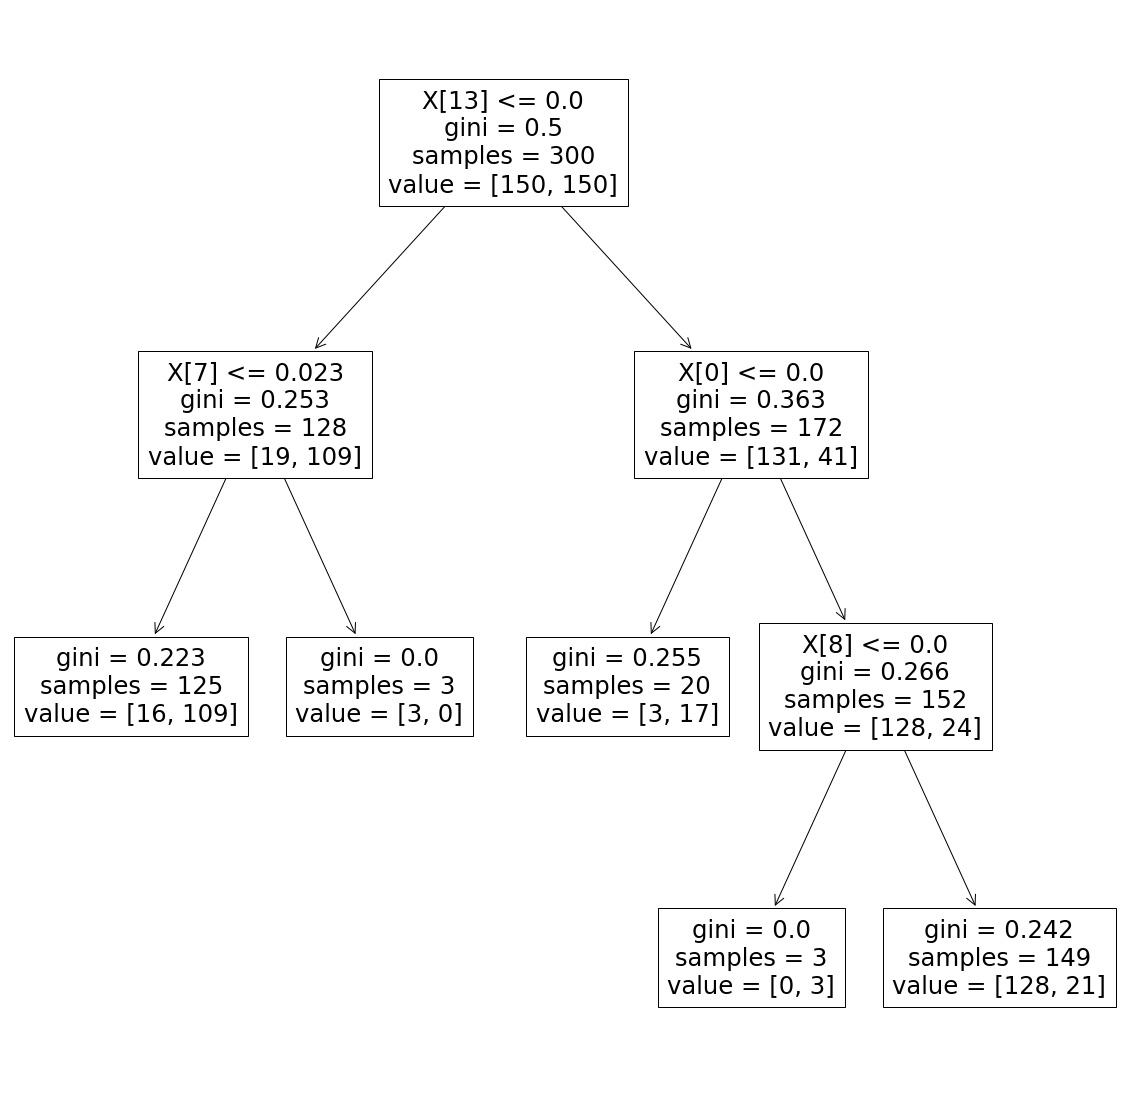

In [162]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
_=tree.plot_tree(model)

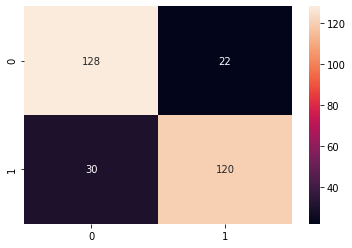

In [163]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),train_X,train_Y,cv=10)
_=sns.heatmap(confusion_matrix(train_Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [164]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=5),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.140000,0.280000
Radial Svm,0.170000,0.267166
Logistic Regression,0.136667,0.273333
KNN,0.606667,0.045461
Decision Tree,0.686667,0.061824
Naive Bayes,0.573333,0.050111
Random Forest,0.786667,0.062716


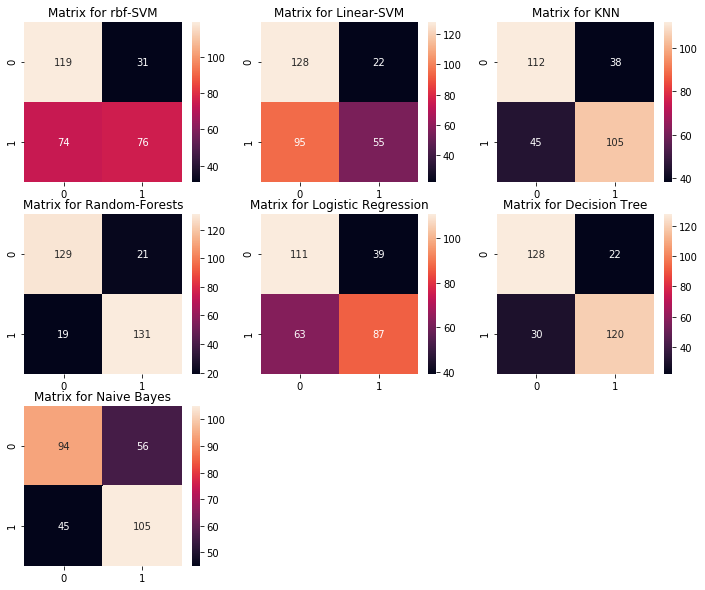

In [165]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),train_X,train_Y,cv=10)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 3- Normalisation C:

In [166]:
data_type_ru_re_C = data_type_ru_re[data_type_ru_re.columns[22:40]].copy()
data_type_ru_re_C.dropna(inplace=True)
data_type_ru_re_C.reset_index(drop=True, inplace=True)

In [167]:
train,test=train_test_split(data_type_ru_re_C,test_size=0.3,random_state=0,stratify=data_type_ru_re_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_re_C[data_type_ru_re_C.columns[:17]]
Y=data_type_ru_re_C['label']

{'Rural': 0, 'Urban': 1, 'Remote': 2}


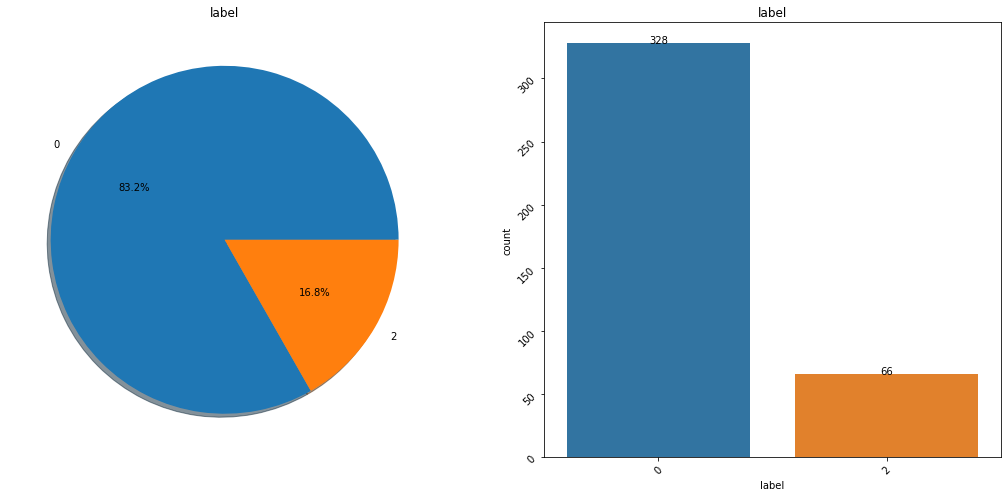

In [168]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [169]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8352941176470589


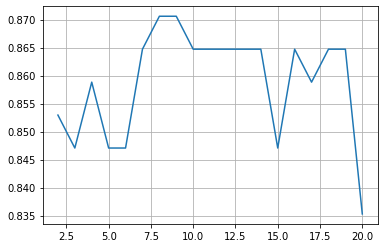

In [170]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [171]:
model=DecisionTreeClassifier(max_leaf_nodes=8)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8647058823529412


In [172]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


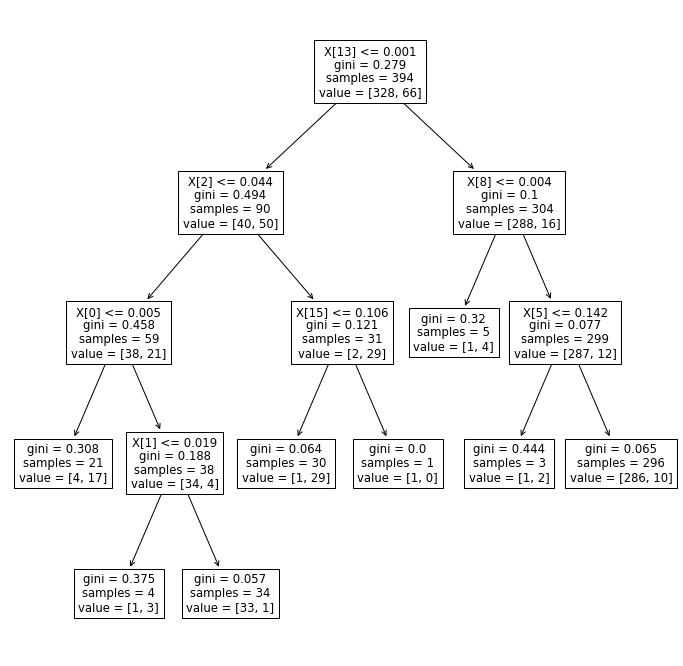

In [173]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

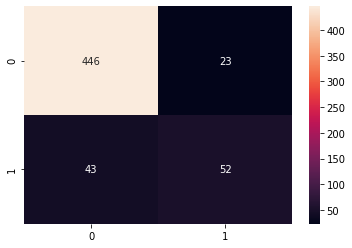

In [174]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=8),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [175]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=8),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.831258,0.112566
Radial Svm,0.822408,0.108983
Logistic Regression,0.831258,0.112566
KNN,0.833186,0.080278
Decision Tree,0.847314,0.083178
Naive Bayes,0.799368,0.090744
Random Forest,0.852639,0.089172


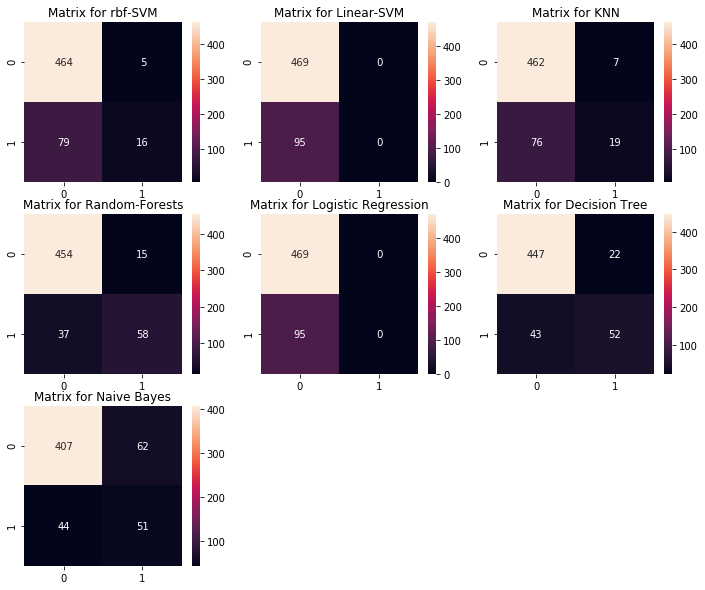

In [176]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=8),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## 4- Normalisation C with oversampling

In [177]:
data_type_ru_re = data.copy()
data_type_ru_re = data_type_ru_re[data_type_ru_re['Type']!='Urban']
data_type_ru_re['label'] = data_type_ru_re['Type'].map({'Rural': 0, 'Urban': 1, 'Remote': 2})

In [178]:
data_type_ru_re_C = data_type_ru_re[data_type_ru_re.columns[22:40]].copy()
data_type_ru_re_C.dropna(inplace=True)
data_type_ru_re_C.reset_index(drop=True, inplace=True)

In [179]:
train,test=train_test_split(data_type_ru_re_C,test_size=0.3,random_state=0,stratify=data_type_ru_re_C['label'])
train_X=train[train.columns[:17]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:17]]
test_Y=test[test.columns[-1:]]
X=data_type_ru_re_C[data_type_ru_re_C.columns[:17]]
Y=data_type_ru_re_C['label']

In [180]:
df = pd.concat([train_X,train_Y],axis=1)
df1 = df[df['label']==2]
df0 = df[df['label']==0]
df01 = df0.sample(150).reset_index(drop=True)
undersampled_df = pd.concat([df01,df1],axis=0).reset_index(drop=True)
train_X = undersampled_df[undersampled_df.columns[:17]]
train_Y = undersampled_df[undersampled_df.columns[-1:]]

In [181]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy={2:150})
train_X, train_Y = sm.fit_sample(train_X, train_Y)

{'Rural': 0, 'Urban': 1, 'Remote': 2}


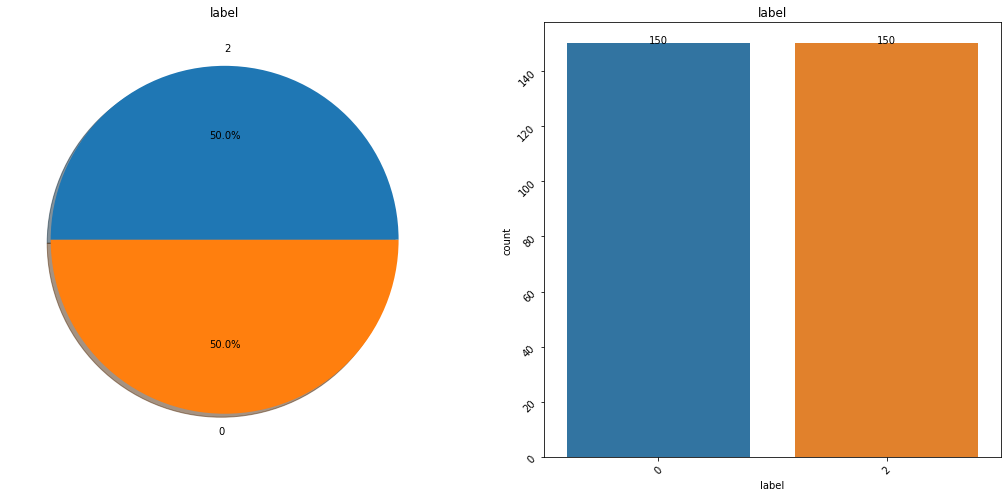

In [182]:
print({'Rural': 0, 'Urban': 1, 'Remote': 2})
col = 'label'
f,ax=plt.subplots(1,2,figsize=(18,8))
train_Y[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
graph1=sns.countplot(col,data=train_Y,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
plt.show()

In [183]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7470588235294118


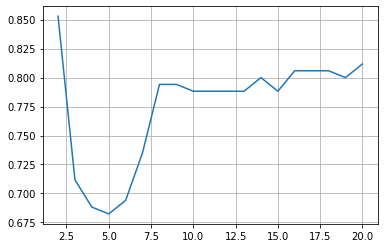

In [184]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [185]:
model=DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.6882352941176471


In [186]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


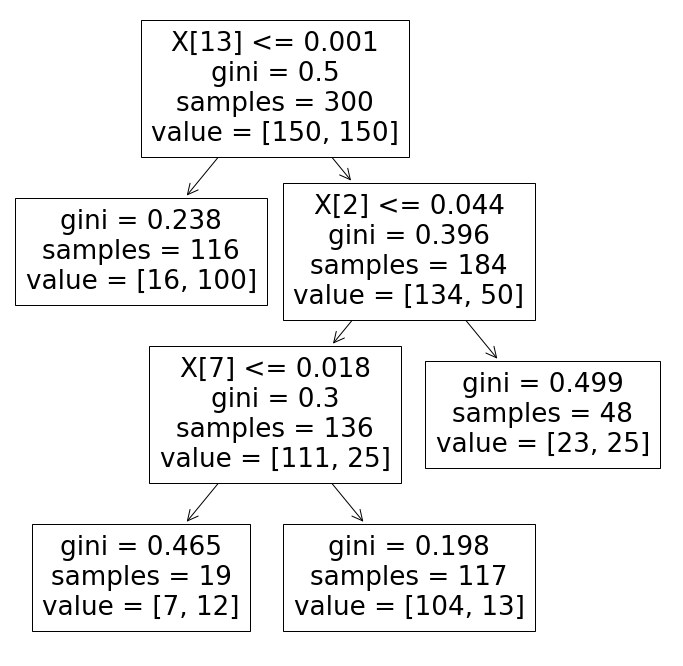

In [187]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

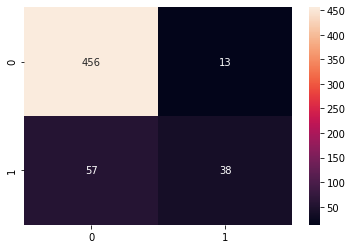

In [188]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),X,Y,cv=10)
_=sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')

In [189]:
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(max_leaf_nodes=4),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.831258,0.112566
Radial Svm,0.822408,0.108983
Logistic Regression,0.831258,0.112566
KNN,0.833186,0.080278
Decision Tree,0.852639,0.095286
Naive Bayes,0.799368,0.090744
Random Forest,0.843742,0.092772


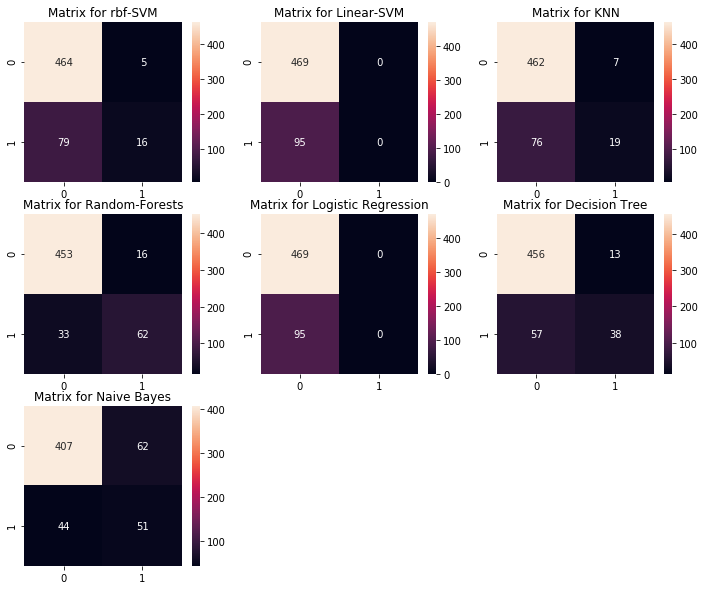

In [190]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(max_leaf_nodes=4),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()